In [641]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

In [642]:
# Get the CSV data here and print head
df= pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [643]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [644]:
df.shape

(209593, 37)

In [645]:
#finding unique values in object data types
def explore_object_type(df_train,feature_name):
    if df[feature_name].dtype == 'object':
        print(df[feature_name].value_counts())

In [646]:
for featureName in df:
    if df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))


"msisdn's" Values with count are :
04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64

"pcircle's" Values with count are :
UPW    209593
Name: pcircle, dtype: int64

"pdate's" Values with count are :
2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64


In [647]:
df.describe(include=['object','datetime']).transpose()

,count,unique,top,freq
msisdn,209593,186243,04581I85330,7
pcircle,209593,1,UPW,209593
pdate,209593,82,2016-07-04,3150


In [648]:
df.shape

(209593, 37)

In [649]:
#msidn is a mobile number of user. and mobile number is unique for every customers. 
#There are only 186243 unique number out of 209593 so rest of the data is duplicates entry

In [650]:
df = df.drop_duplicates(subset = 'msisdn',keep='first')
df.shape

(186243, 37)

In [651]:
#we can drop msisdn feature column as there are many unique values ad it is ot required
df.drop('msisdn',axis=1,inplace=True)

In [652]:
#we can drop the pcircle as there is only 1 unique value
df.drop('pcircle',axis=1,inplace=True)

In [653]:
#for pdate
#Making the new column Day, Month and year from pdate column
df['pDay']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.day
df['pMonth']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.month
df['pYear']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.year

In [654]:
df.head()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,pDay,pMonth,pYear
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016


In [655]:

#Checking the number of months  and days
df['pDay'].unique()

array([20, 10, 19,  6, 22,  2,  5, 15,  8, 12, 29, 16,  3, 24,  4,  1, 26,
       23,  9,  7, 27, 11, 30, 14, 21, 25, 28, 18, 13, 17, 31],
      dtype=int64)

In [656]:
df['pMonth'].unique()

array([7, 8, 6], dtype=int64)

In [657]:
#dropping the pate fetaure column as it is no longer required
df.drop(columns=['pdate'],axis=1, inplace = True)

In [658]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186243 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            186243 non-null  int64  
 1   label                 186243 non-null  int64  
 2   aon                   186243 non-null  float64
 3   daily_decr30          186243 non-null  float64
 4   daily_decr90          186243 non-null  float64
 5   rental30              186243 non-null  float64
 6   rental90              186243 non-null  float64
 7   last_rech_date_ma     186243 non-null  float64
 8   last_rech_date_da     186243 non-null  float64
 9   last_rech_amt_ma      186243 non-null  int64  
 10  cnt_ma_rech30         186243 non-null  int64  
 11  fr_ma_rech30          186243 non-null  float64
 12  sumamnt_ma_rech30     186243 non-null  float64
 13  medianamnt_ma_rech30  186243 non-null  float64
 14  medianmarechprebal30  186243 non-null  float64
 15  

In [659]:
#finding unique values in int64 data types
def explore_object_type(df,feature_name):
    if df[feature_name].dtype == 'int64':
        print(df[feature_name].value_counts())

In [660]:
for featureName in df:
    if df[featureName].dtype == 'int64':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))


"Unnamed: 0's" Values with count are :
1         1
134331    1
134333    1
134334    1
134336    1
         ..
64547     1
64548     1
64549     1
64550     1
209593    1
Name: Unnamed: 0, Length: 186243, dtype: int64

"label's" Values with count are :
1    160383
0     25860
Name: label, dtype: int64

"last_rech_amt_ma's" Values with count are :
1539     48613
770      36543
0        20290
773      17363
2309     13906
         ...  
22609        1
19913        1
14783        1
4066         1
10454        1
Name: last_rech_amt_ma, Length: 70, dtype: int64

"cnt_ma_rech30's" Values with count are :
1     35382
2     28911
0     27045
3     23058
4     17815
      ...  
84        1
53        1
59        1
74        1
55        1
Name: cnt_ma_rech30, Length: 62, dtype: int64

"cnt_ma_rech90's" Values with count are :
1      26665
2      22520
0      20249
3      18858
4      15733
       ...  
127        1
336        1
91         1
81         1
87         1
Name: cnt_ma_rech90, Length: 

In [661]:
#lets drop unamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [662]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,209580,209581,209582,209583,209584,209585,209587,209588,209591,209592
label,0.00,1.00,1.00,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00,1.000000,1.00,1.000000,0.0,1.000000,1.00,1.000000,1.000000,1.000
aon,272.00,712.00,535.00,241.000,947.000000,568.000000,545.000000,768.000000,1191.000000,536.000000,...,1365.00,377.000000,93.00,935.000000,945.0,793.000000,239.00,404.000000,1732.000000,1581.000
daily_decr30,3055.05,12122.00,1398.00,21.228,150.619333,2257.362667,2876.641667,12905.000000,90.695000,29.357333,...,18657.00,28785.000000,1062.40,15.550667,0.0,5350.315333,14678.00,151.872333,12488.228333,4489.362
daily_decr90,3065.15,12124.75,1398.00,21.228,150.619333,2261.460000,2883.970000,17804.150000,90.695000,29.357333,...,24825.00,45515.000000,1065.50,15.550667,0.0,5356.210000,14704.90,151.872333,12574.370000,4534.820
rental30,220.13,3691.26,900.13,159.420,1098.900000,368.130000,335.750000,900.350000,2287.500000,612.960000,...,6314.34,3956.570000,248.13,140.440000,78.3,594.800000,12935.26,1089.190000,411.830000,483.920
rental90,260.13,3691.26,900.13,159.420,1098.900000,380.130000,402.900000,2549.110000,2287.500000,612.960000,...,12318.22,14753.130000,260.13,140.440000,78.3,640.200000,16775.60,1089.190000,984.580000,631.200
last_rech_date_ma,2.00,20.00,3.00,41.000,4.000000,2.000000,13.000000,4.000000,1.000000,11.000000,...,26.00,2.000000,1.00,4.000000,0.0,2.000000,8.00,1.000000,2.000000,13.000
last_rech_date_da,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.000000,38.000000,0.000
last_rech_amt_ma,1539.00,5787.00,1539.00,947.000,2309.000000,1539.000000,5787.000000,3178.000000,1539.000000,773.000000,...,11874.00,1539.000000,1539.00,1547.000000,0.0,2309.000000,3178.00,4048.000000,773.000000,7526.000
cnt_ma_rech30,2.00,1.00,1.00,0.000,7.000000,4.000000,1.000000,3.000000,4.000000,1.000000,...,1.00,4.000000,1.00,3.000000,0.0,4.000000,3.00,3.000000,5.000000,2.000


In [663]:
#Remove columns where number of unique value is only 1.
unique = df.nunique()
unique = unique[unique.values == 1]

In [664]:
df.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",df.shape ,"rows & columns.")

So now we are left with (186243, 35) rows & columns.


In [665]:
#finding unique values in float64 data types
def explore_object_type(df,feature_name):
    if df[feature_name].dtype == 'float64':
        print(df[feature_name].value_counts())

In [666]:
for featureName in df:
    if df[featureName].dtype == 'float64':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))


"aon's" Values with count are :
95.000000        366
92.000000        342
96.000000        339
99.000000        335
94.000000        328
                ... 
847385.682864      1
602000.328014      1
825740.918634      1
654148.566653      1
581435.484230      1
Name: aon, Length: 4282, dtype: int64

"daily_decr30's" Values with count are :
0.000000       4136
500.000000      823
1000.000000     557
700.000000      377
600.000000      347
               ... 
7649.996000       1
133.739000        1
21.924000         1
3702.133333       1
4489.362000       1
Name: daily_decr30, Length: 130323, dtype: int64

"daily_decr90's" Values with count are :
0.000000       4055
500.000000      776
1000.000000     482
700.000000      339
600.000000      309
               ... 
1700.300000       1
155.725000        1
75.226667         1
9525.680000       1
4534.820000       1
Name: daily_decr90, Length: 139842, dtype: int64

"rental30's" Values with count are :
0.00        7306
200.13      1281
99.5

In [667]:
#Seprate the categorical columns and Numerical columns
cat_df,num_df=[],[]

for i in df.columns:
    if df[i].dtype==object:
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_df))
print('>>> Number of Numerical Feature::', len(num_df))

>>> Total Number of Feature:: 35
>>> Number of categorical features:: 0
>>> Number of Numerical Feature:: 35


In [668]:
#Printing the float and int datatype columns and unique values 

#finding unique values in int64 data type
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'int64':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
5,sumamnt_ma_rech90,27970
3,cnt_ma_rech90,99
4,fr_ma_rech90,89
1,last_rech_amt_ma,70
10,amnt_loans90,63
2,cnt_ma_rech30,62
7,fr_da_rech90,46
9,amnt_loans30,44
8,cnt_loans30,36
12,pDay,31


In [669]:
#finding unique values in float64 data type
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'float64':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table


,Col_name,Value
2,daily_decr90,139842
1,daily_decr30,130323
4,rental90,125595
3,rental30,117881
10,medianmarechprebal30,28486
12,medianmarechprebal90,28064
8,sumamnt_ma_rech30,13130
0,aon,4282
20,payback90,2128
19,payback30,1249


In [670]:
#payback30','payback90' has nearly 50% of the values having 0.
#almost 90% of 'last_rech_date_da', 'cnt_da_rech90 ','fr_da_rech90','medianamnt_loans30','medianamnt_loans90' has of values which is 0.

<AxesSubplot:>

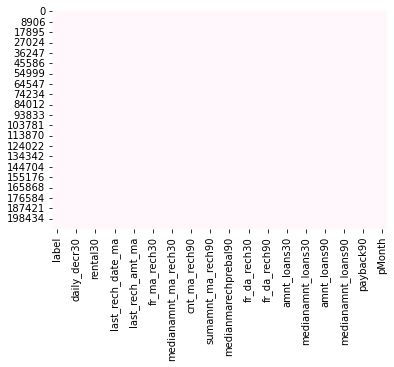

In [671]:
#checking for any missing data
# Missing Data Pattern 
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [672]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()
#as we can see, there are no missing values

,Total,Percent
label,0,0.0
medianamnt_loans30,0,0.0
fr_da_rech30,0,0.0
cnt_da_rech90,0,0.0
fr_da_rech90,0,0.0


In [673]:
#trying to see if there is a rel with the columns which have days, month and year

In [674]:
Duration = [f for f in df.columns if "pDay" in f or "pMonth" in f]
Duration

['pDay', 'pMonth']

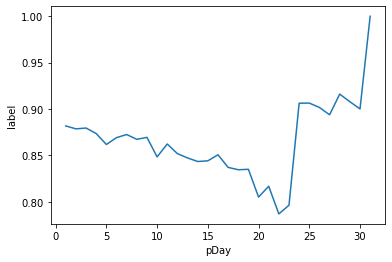

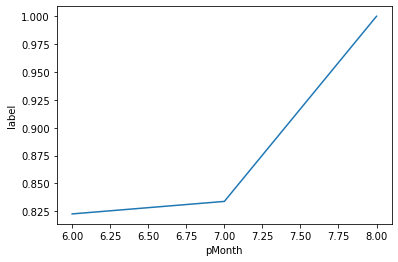

In [675]:
for i in Duration : 
    data = df.copy()
    data.groupby(i)['label'].mean().plot()
    plt.xlabel(i)
    plt.ylabel("label")
    plt.show()

<AxesSubplot:>

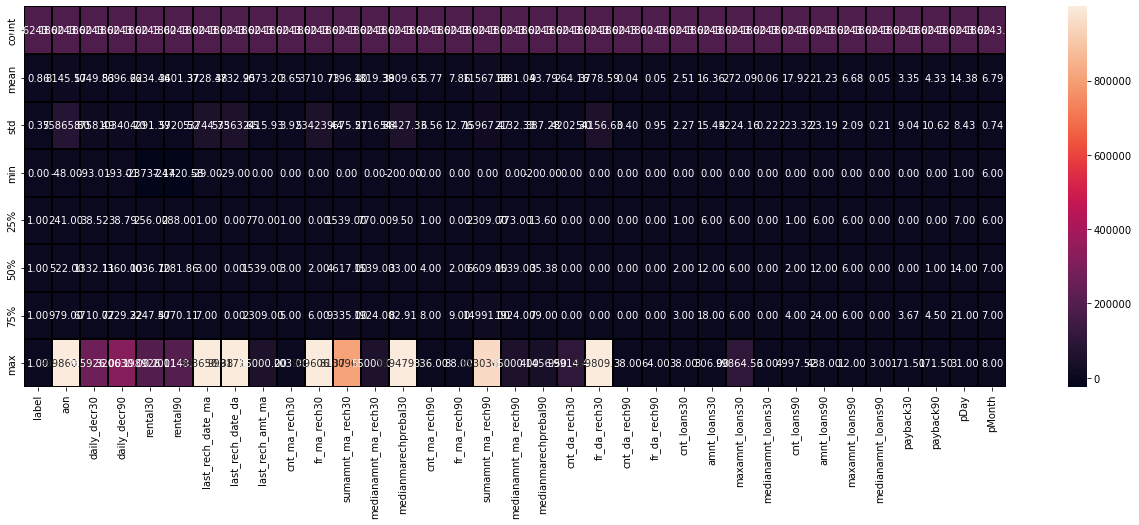

In [676]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

<AxesSubplot:>

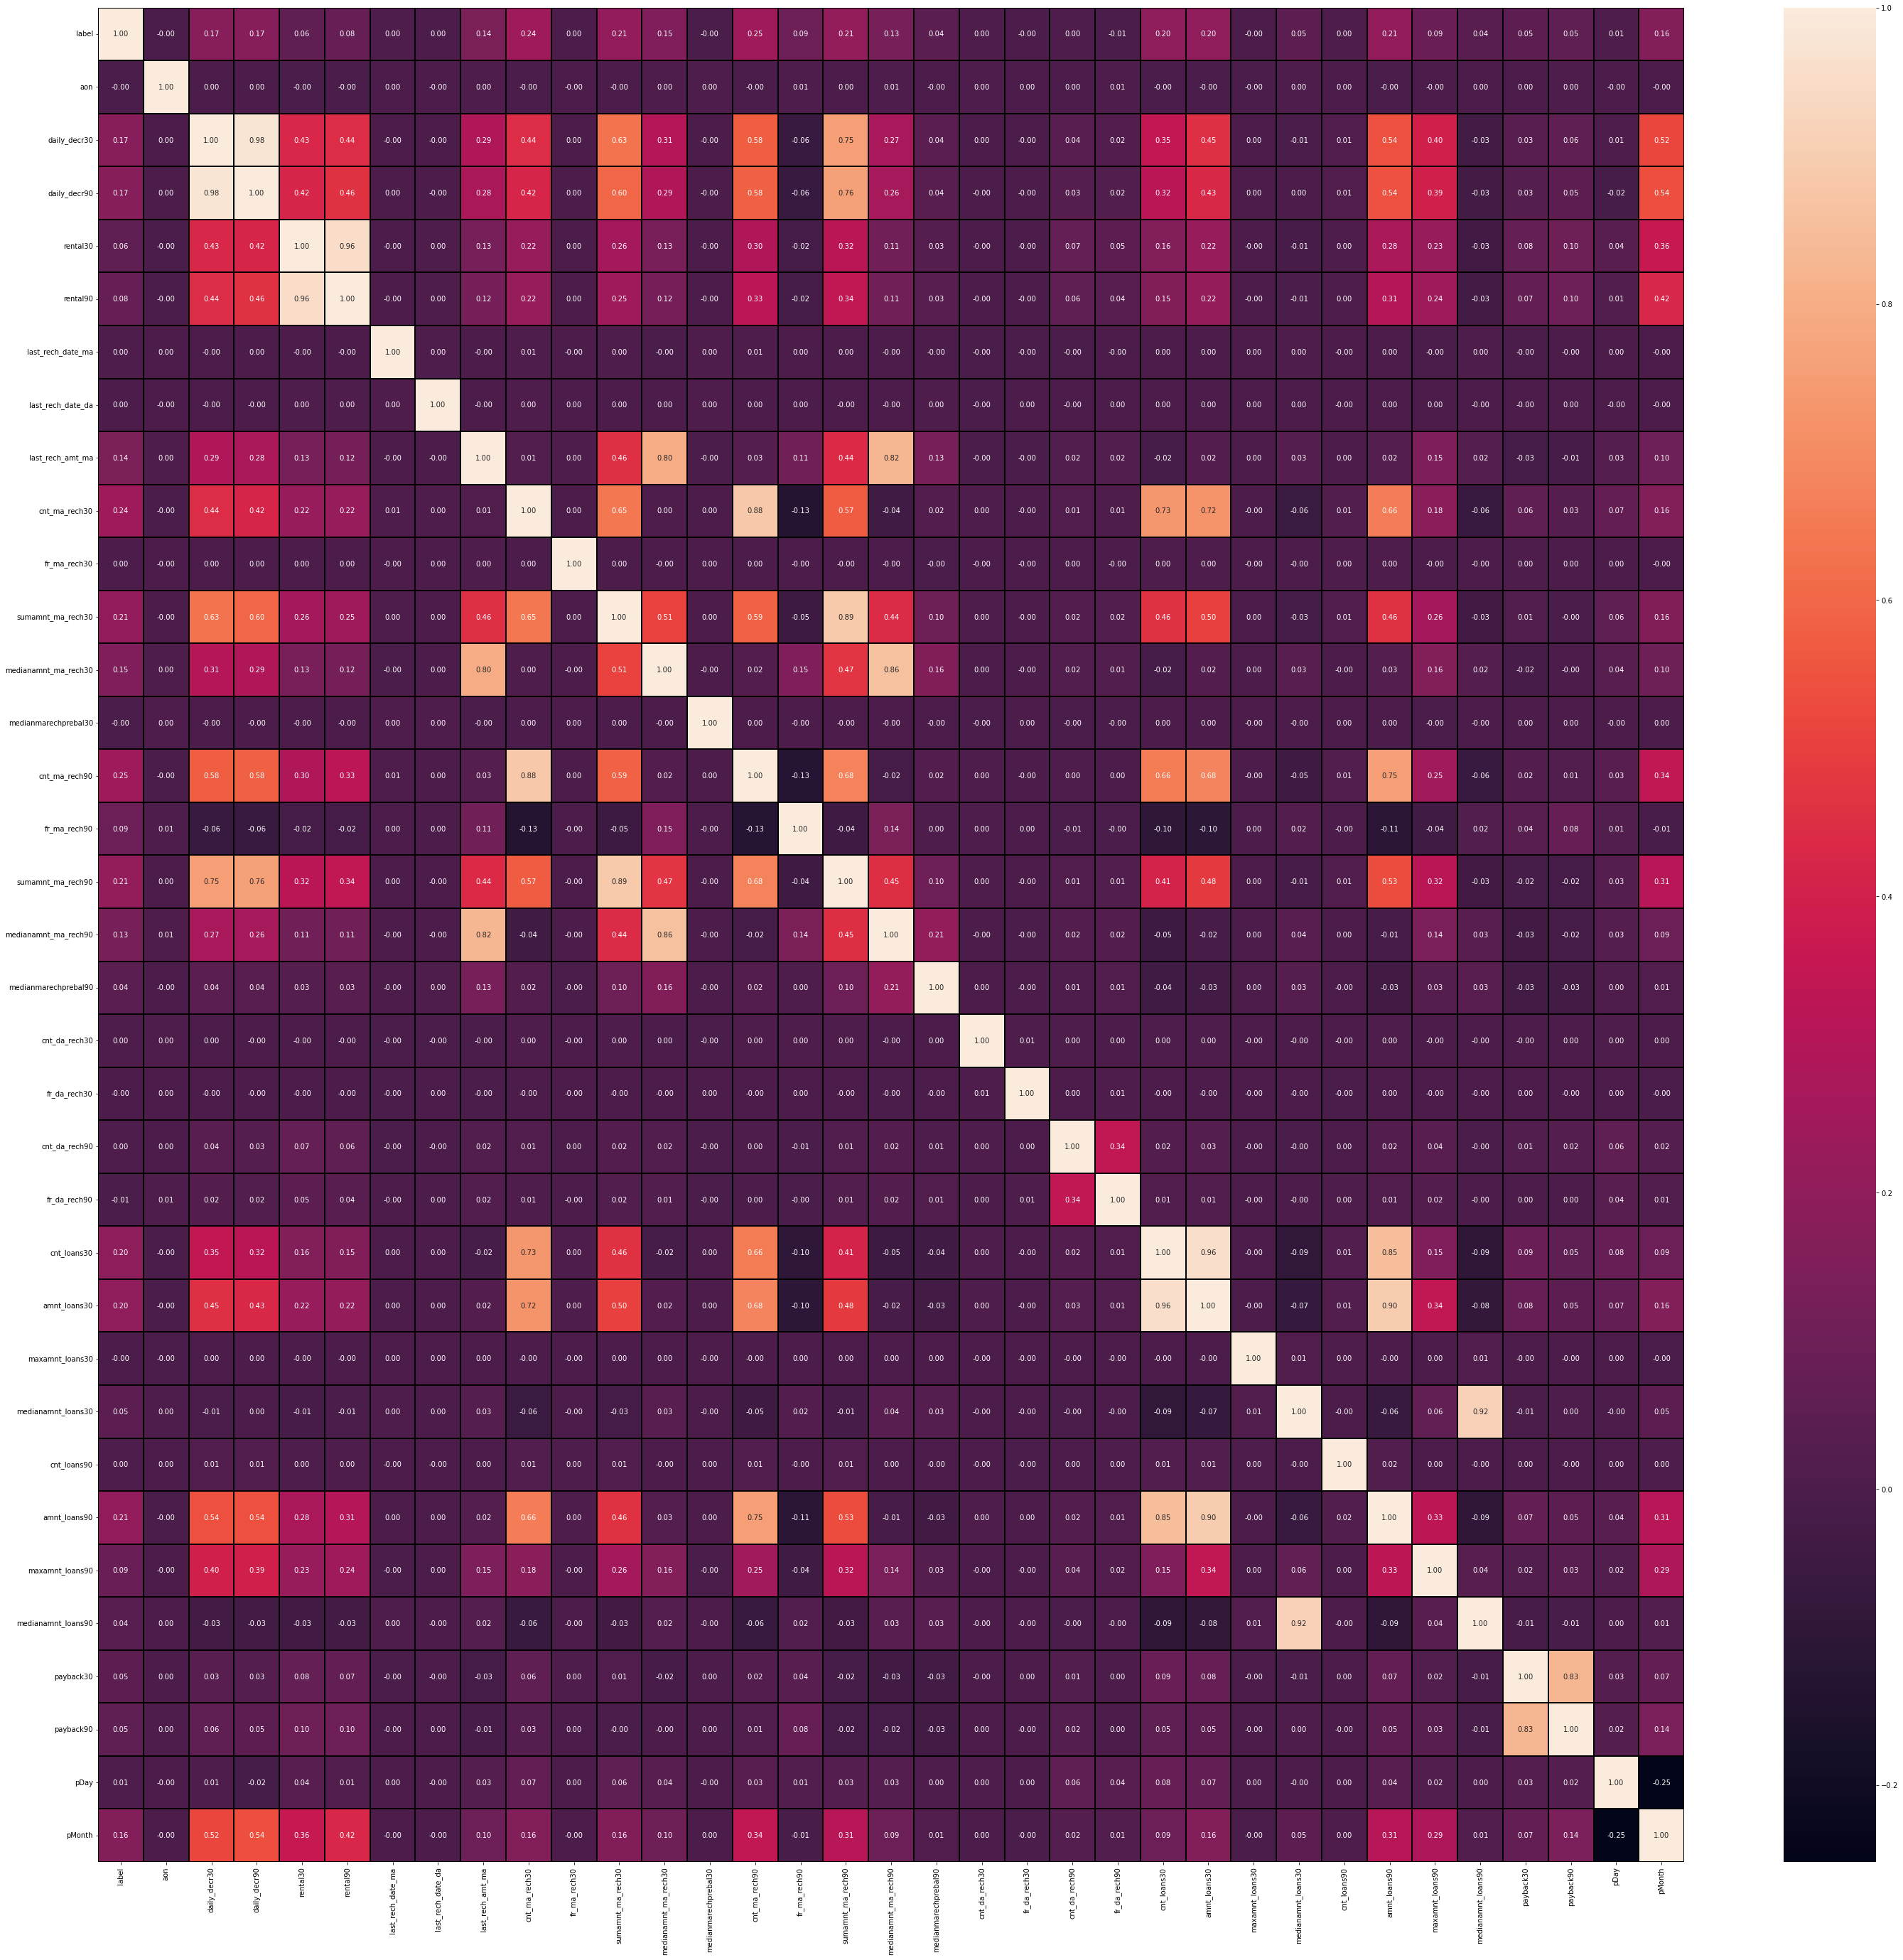

In [677]:
plt.figure(figsize=(50,48))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [679]:
#following relations are highly correlated in the matrix:
#rental30,rental90
#payback90 vs payback30
#sumamnt_ma_rech90, daily_decr30
#sumamnt_ma_rech30 vs sumamnt_ma_rech90
#sumamnt_ma_rech90 vs daily_decr90
#medianamnt_loans90 vs medianamnt_loans30
#amnt_loans30 vs amnt_loans90
#amnt_loans30 vs cnt_loans90
#cnt_loans30 vs amnt_loans30
#cnt_loans90 vs amnt_loans90

#medianamnt_ma_rech90 vs medianamnt_ma_rech30
#medianamnt_ma_rech90 vs last_rech_amt_ma
#last_rech_amt_ma vs medianmarechprebal30
#cnt_ma_rech90 vs cnt_ma_rech30
#last_rech_amt_ma vs medianamnt_ma_rech30
#last_rech_amt_ma vs medianamnt_ma_rech90


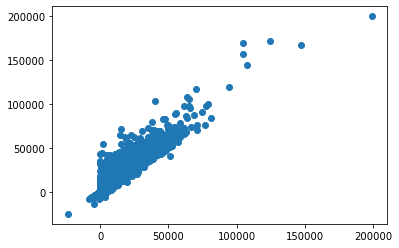

In [680]:
#Lets check with scatter plot
plt.scatter(df.rental30, df.rental90)
plt.show()

In [681]:
df.daily_decr30

0          3055.050000
1         12122.000000
2          1398.000000
3            21.228000
4           150.619333
              ...     
209585     5350.315333
209587    14678.000000
209588      151.872333
209591    12488.228333
209592     4489.362000
Name: daily_decr30, Length: 186243, dtype: float64

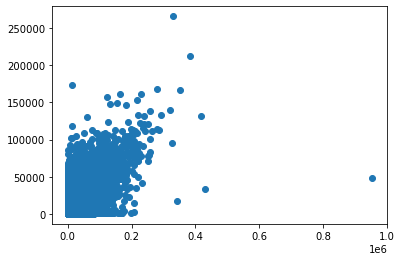

In [682]:
#Lets check with scatter plot
plt.scatter(df.sumamnt_ma_rech90, df.daily_decr30)
plt.show()

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

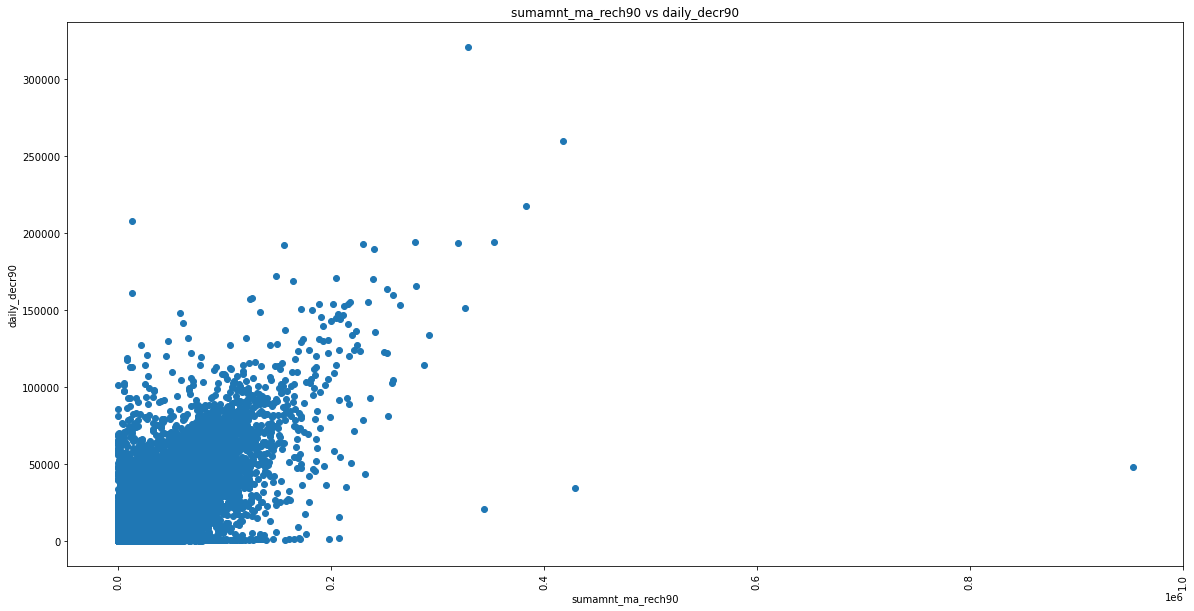

In [683]:

plt.figure(figsize = (20,10))
plt.title('sumamnt_ma_rech90 vs daily_decr90')
plt.scatter(df['sumamnt_ma_rech90'], df['daily_decr90'])
plt.xticks
plt.xlabel('sumamnt_ma_rech90')
plt.ylabel('daily_decr90')
plt.xticks(rotation = 90)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

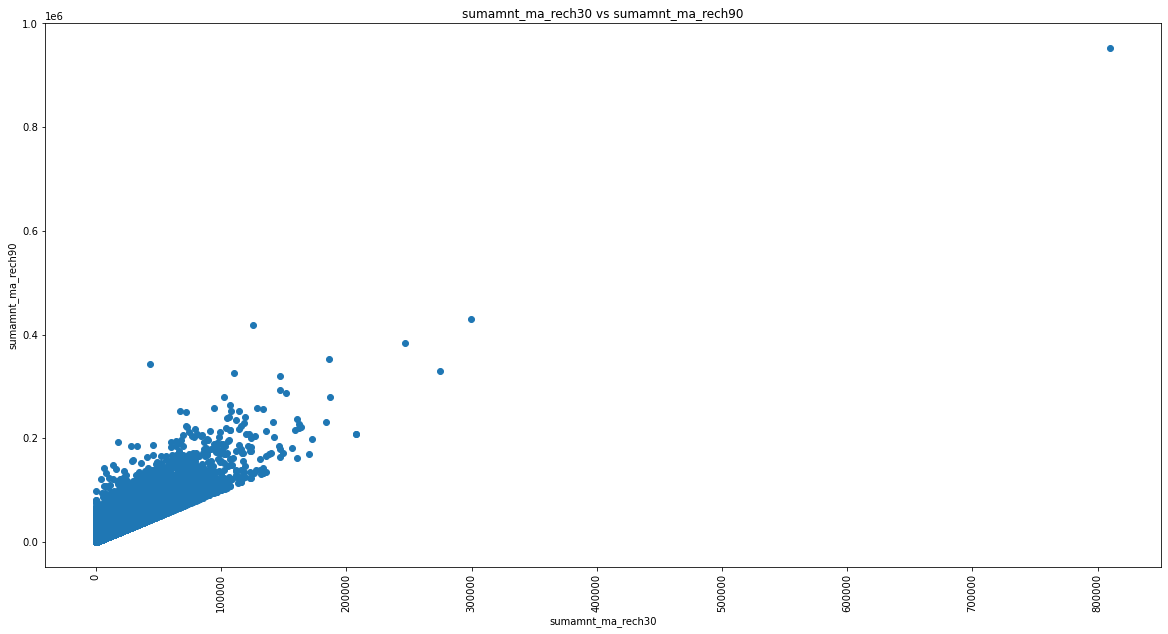

In [684]:
plt.figure(figsize = (20,10))
plt.title('sumamnt_ma_rech30 vs sumamnt_ma_rech90')
plt.scatter(df['sumamnt_ma_rech30'], df['sumamnt_ma_rech90'])
plt.xticks
plt.xlabel('sumamnt_ma_rech30')
plt.ylabel('sumamnt_ma_rech90')
plt.xticks(rotation = 90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

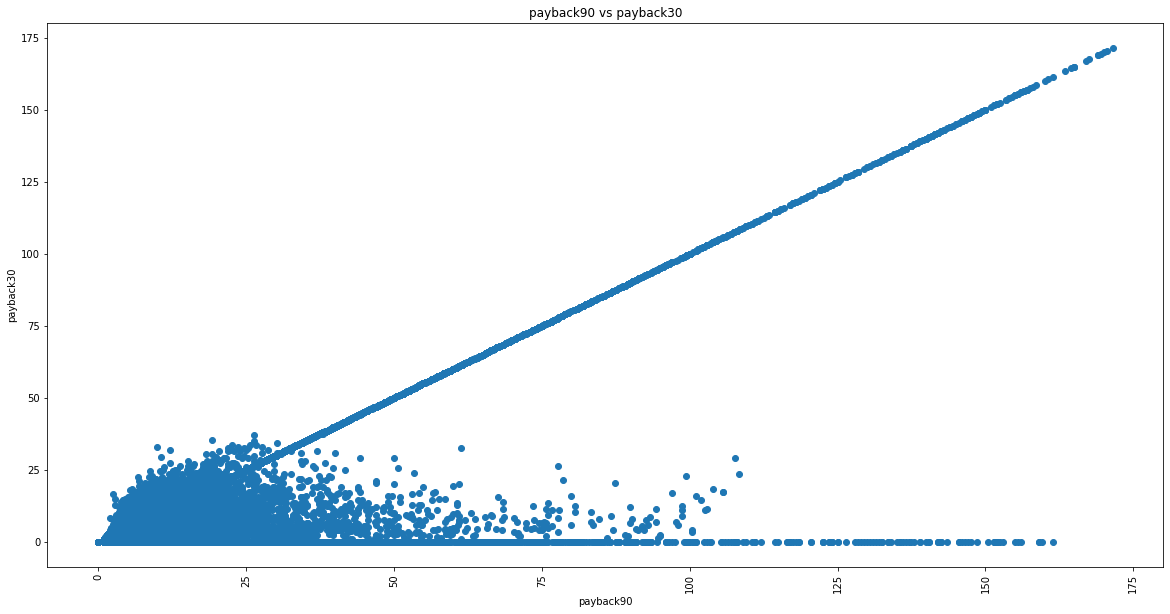

In [685]:
#payback90 vs payback30
plt.figure(figsize = (20,10))
plt.title('payback90 vs payback30')
plt.scatter(df['payback90'], df['payback30'])
plt.xticks
plt.xlabel('payback90')
plt.ylabel('payback30')
plt.xticks(rotation = 90)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

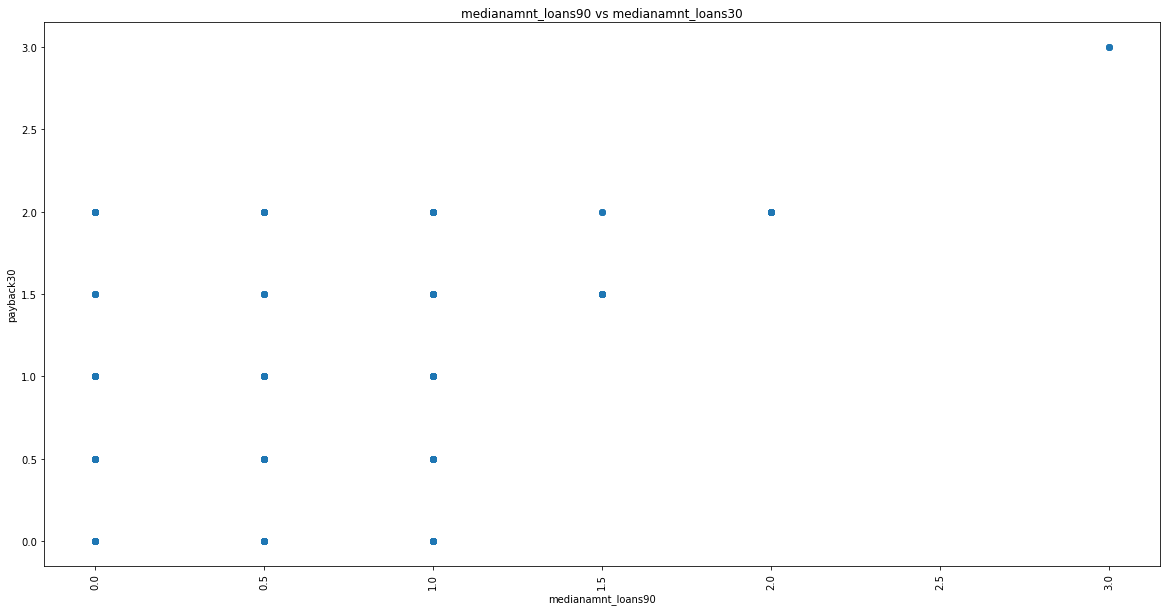

In [686]:

#medianamnt_loans90 vs medianamnt_loans30
plt.figure(figsize = (20,10))
plt.title('medianamnt_loans90 vs medianamnt_loans30')
plt.scatter(df['medianamnt_loans90'], df['medianamnt_loans30'])
plt.xticks
plt.xlabel('medianamnt_loans90')
plt.ylabel('payback30')
plt.xticks(rotation = 90)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

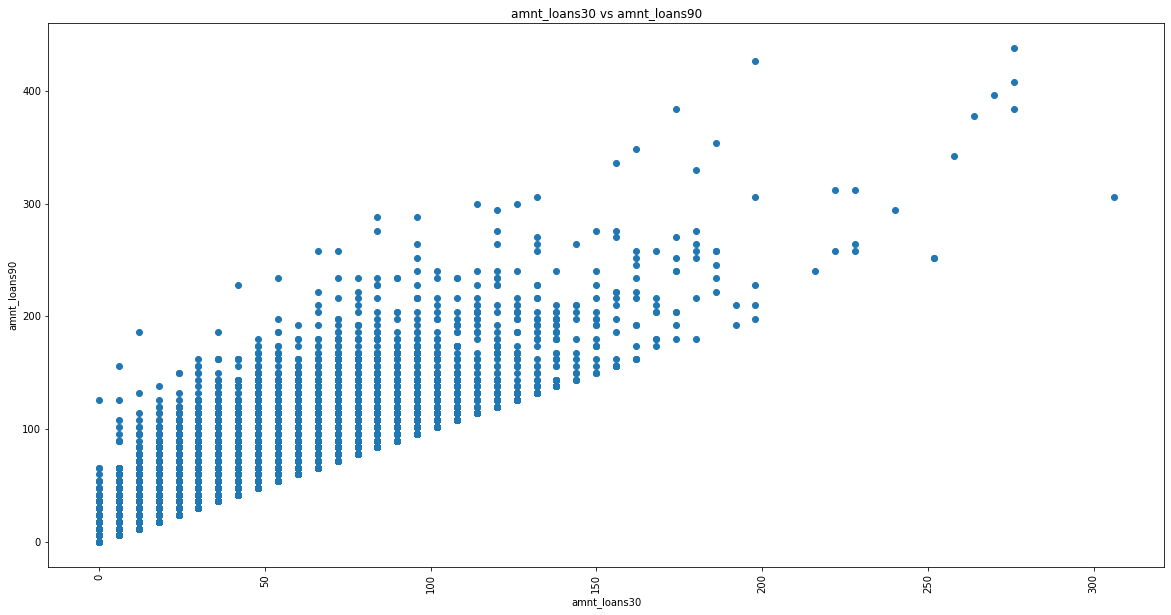

In [687]:
#amnt_loans30 vs amnt_loans90
plt.figure(figsize = (20,10))
plt.title('amnt_loans30 vs amnt_loans90')
plt.scatter(df['amnt_loans30'], df['amnt_loans90'])
plt.xticks
plt.xlabel('amnt_loans30')
plt.ylabel('amnt_loans90')
plt.xticks(rotation = 90)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

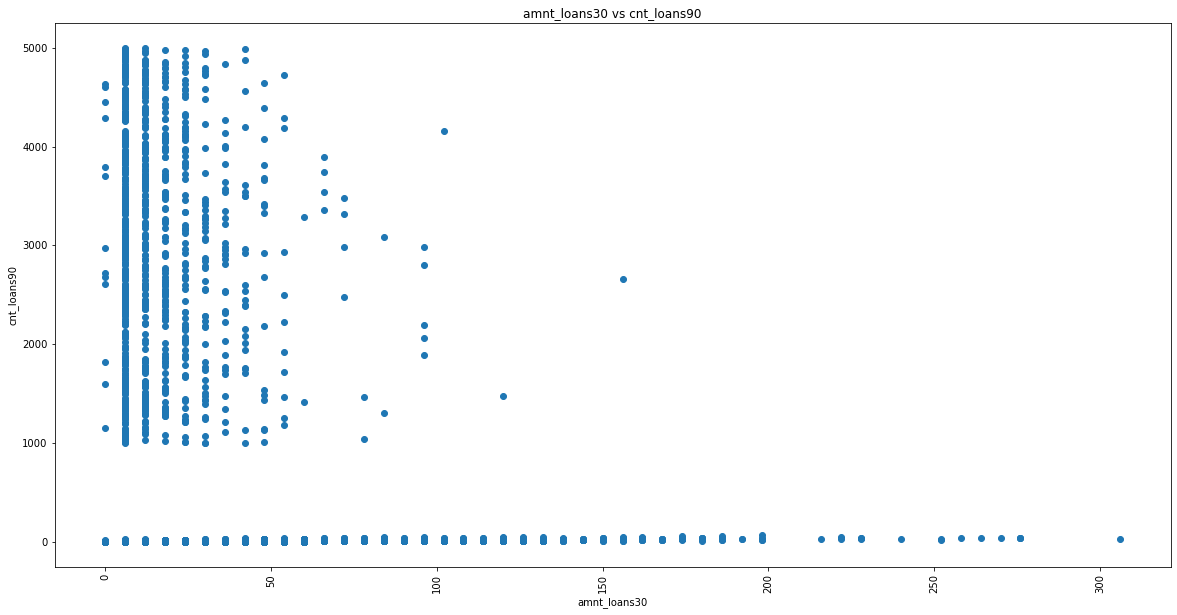

In [688]:

#amnt_loans30 vs cnt_loans90
plt.figure(figsize = (20,10))
plt.title('amnt_loans30 vs cnt_loans90')
plt.scatter(df['amnt_loans30'], df['cnt_loans90'])
plt.xticks
plt.xlabel('amnt_loans30')
plt.ylabel('cnt_loans90')
plt.xticks(rotation = 90)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

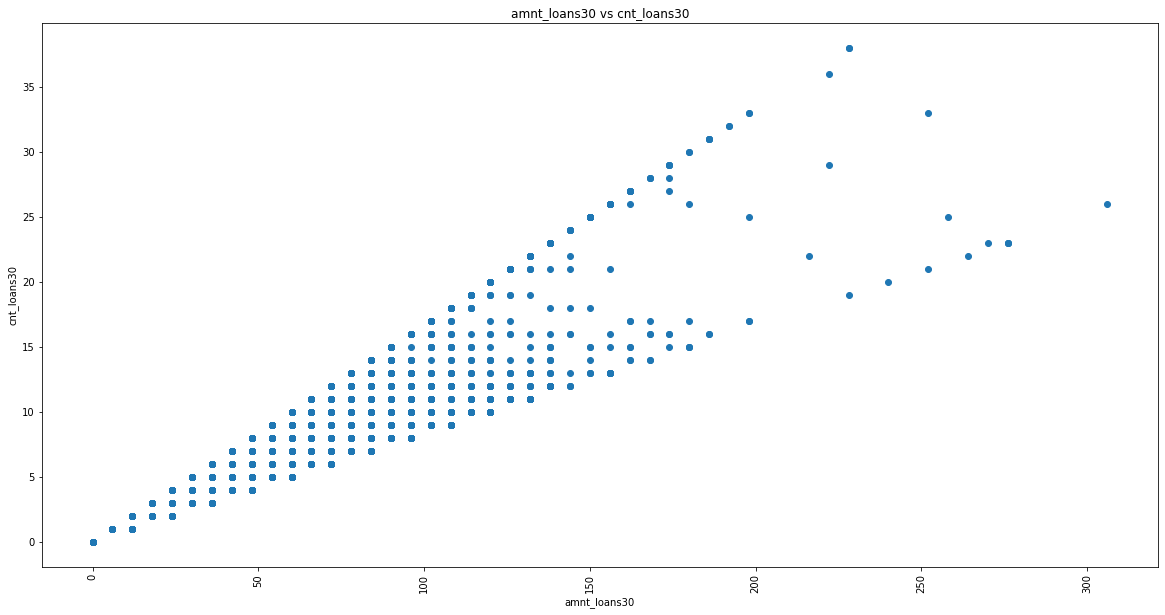

In [689]:
#cnt_loans30 vs amnt_loans30
plt.figure(figsize = (20,10))
plt.title('amnt_loans30 vs cnt_loans30')
plt.scatter(df['amnt_loans30'], df['cnt_loans30'])
plt.xticks
plt.xlabel('amnt_loans30')
plt.ylabel('cnt_loans30')
plt.xticks(rotation = 90)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

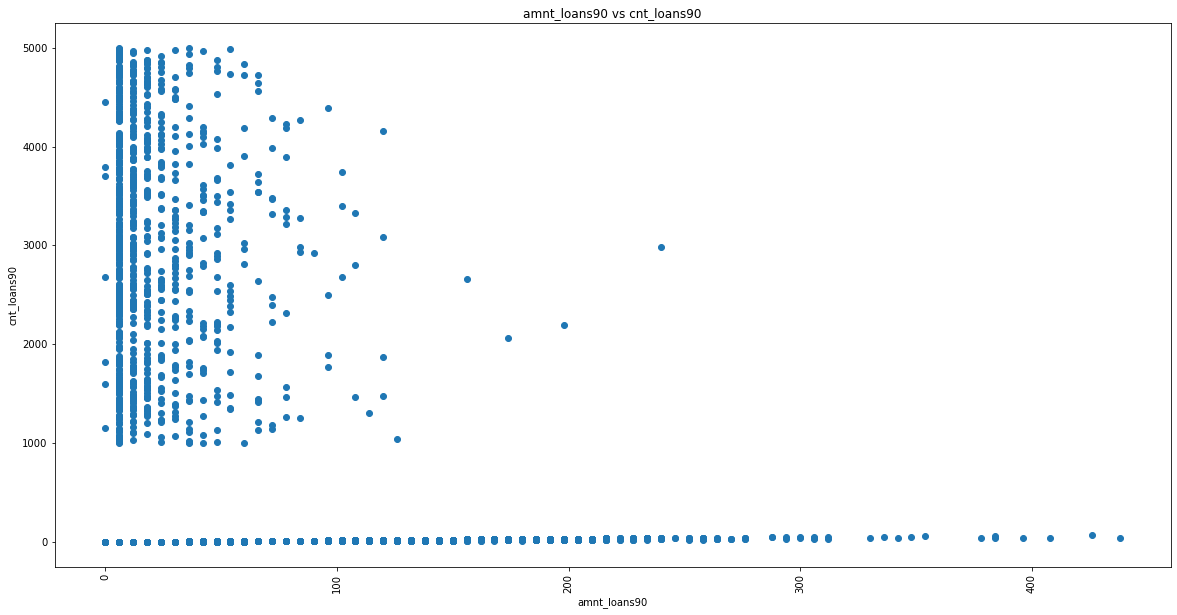

In [690]:
#amnt_loans90 vs cnt_loans90
plt.figure(figsize = (20,10))
plt.title('amnt_loans90 vs cnt_loans90')
plt.scatter(df['amnt_loans90'], df['cnt_loans90'])
plt.xticks
plt.xlabel('amnt_loans90')
plt.ylabel('cnt_loans90')
plt.xticks(rotation = 90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

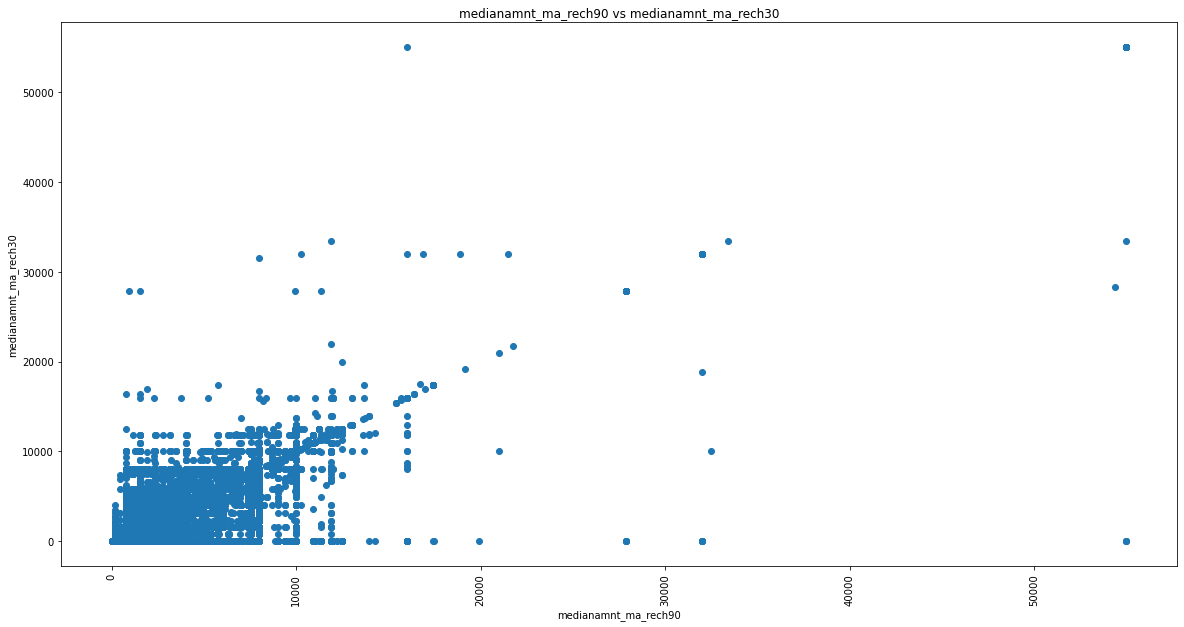

In [691]:

#last_rech_amt_ma vs medianamnt_ma_rech90
plt.figure(figsize = (20,10))
plt.title('medianamnt_ma_rech90 vs medianamnt_ma_rech30')
plt.scatter(df['medianamnt_ma_rech90'], df['medianamnt_ma_rech30'])
plt.xticks
plt.xlabel('medianamnt_ma_rech90')
plt.ylabel('medianamnt_ma_rech30')
plt.xticks(rotation = 90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

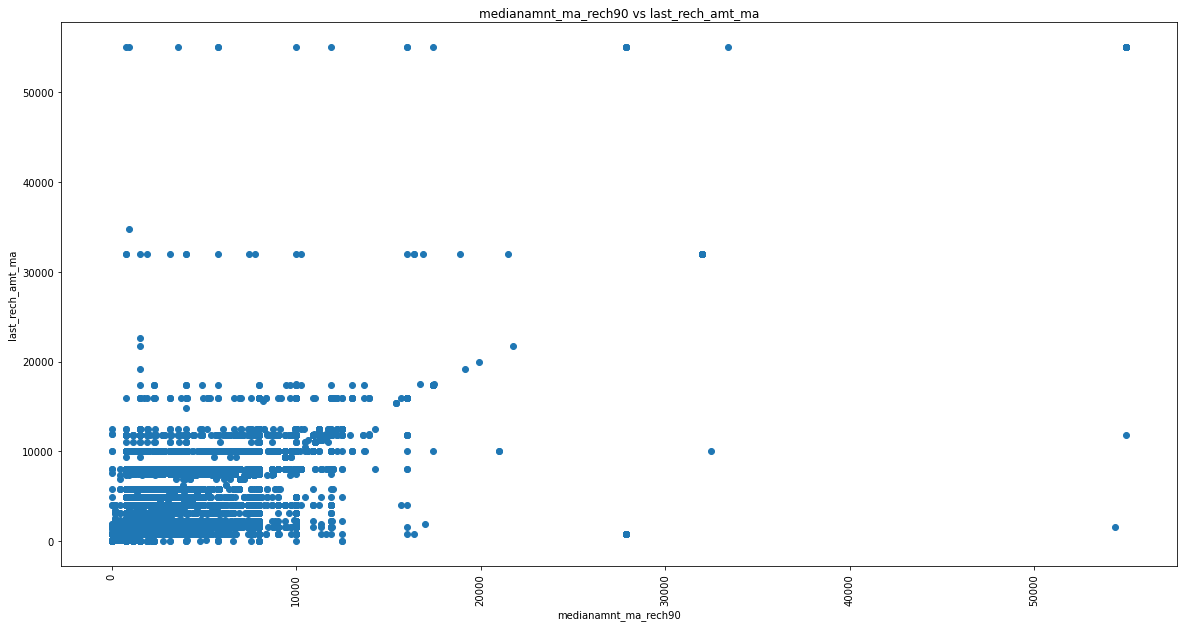

In [692]:

#medianamnt_ma_rech90 vs last_rech_amt_ma
plt.figure(figsize = (20,10))
plt.title('medianamnt_ma_rech90 vs last_rech_amt_ma')
plt.scatter(df['medianamnt_ma_rech90'], df['last_rech_amt_ma'])
plt.xticks
plt.xlabel('medianamnt_ma_rech90')
plt.ylabel('last_rech_amt_ma')
plt.xticks(rotation = 90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

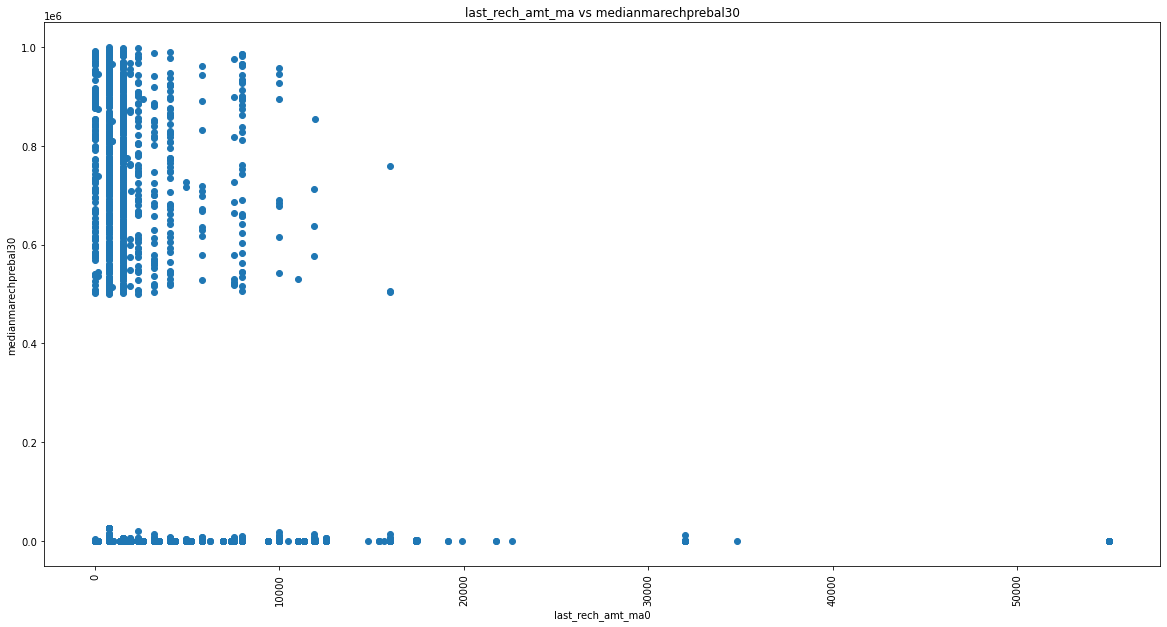

In [693]:
#last_rech_amt_ma vs medianmarechprebal30
plt.figure(figsize = (20,10))
plt.title('last_rech_amt_ma vs medianmarechprebal30')
plt.scatter(df['last_rech_amt_ma'], df['medianmarechprebal30'])
plt.xticks
plt.xlabel('last_rech_amt_ma0')
plt.ylabel('medianmarechprebal30')
plt.xticks(rotation = 90)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

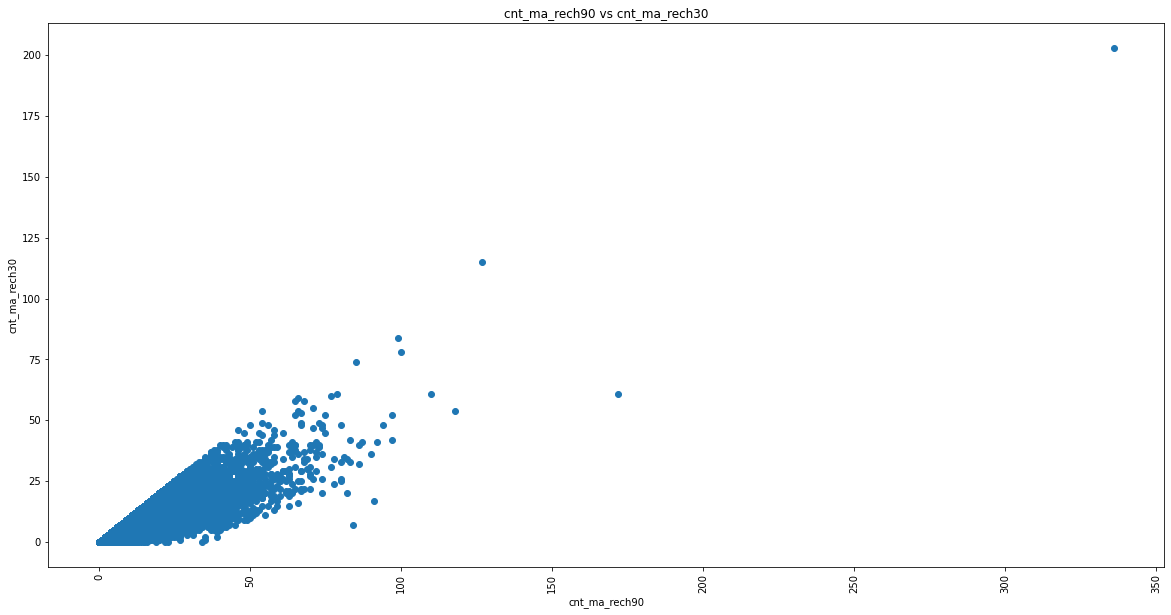

In [694]:
#cnt_ma_rech90 vs cnt_ma_rech30
plt.figure(figsize = (20,10))
plt.title('cnt_ma_rech90 vs cnt_ma_rech30')
plt.scatter(df['cnt_ma_rech90'], df['cnt_ma_rech30'])
plt.xticks
plt.xlabel('cnt_ma_rech90')
plt.ylabel('cnt_ma_rech30')
plt.xticks(rotation = 90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

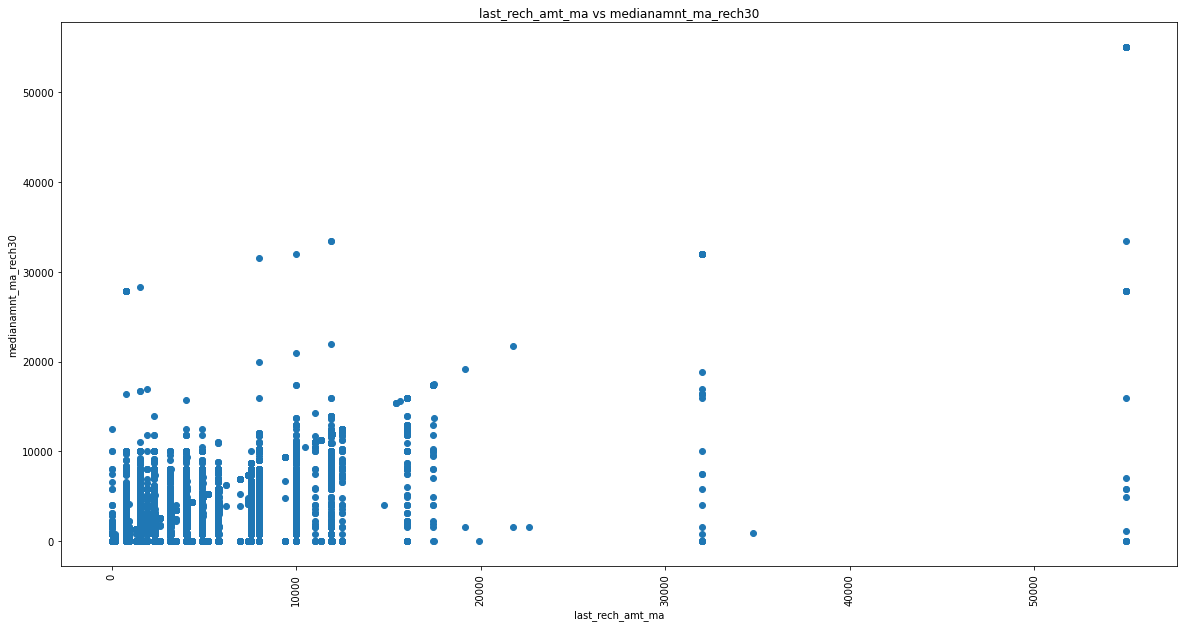

In [695]:

#last_rech_amt_ma vs medianamnt_ma_rech30
plt.figure(figsize = (20,10))
plt.title('last_rech_amt_ma vs medianamnt_ma_rech30')
plt.scatter(df['last_rech_amt_ma'], df['medianamnt_ma_rech30'])
plt.xticks
plt.xlabel('last_rech_amt_ma')
plt.ylabel('medianamnt_ma_rech30')
plt.xticks(rotation = 90)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

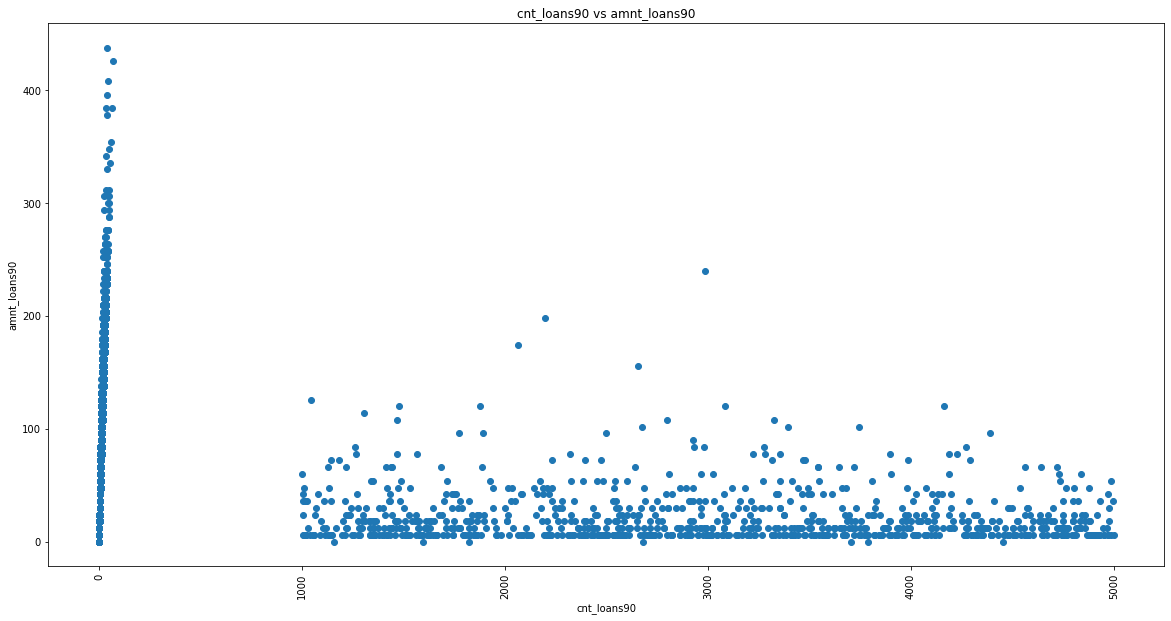

In [696]:
#cnt_loans90 vs amnt_loans90
plt.figure(figsize = (20,10))
plt.title('cnt_loans90 vs amnt_loans90')
plt.scatter(df['cnt_loans90'], df['amnt_loans90'])
plt.xticks
plt.xlabel('cnt_loans90')
plt.ylabel('amnt_loans90')
plt.xticks(rotation = 90)

In [697]:
#i also wanted to compare other relations , checking for relations
#i will not be removing multi corrlinearity columns as they hardly make a difference in the modelling
#I will only focus on removing outliers
#cnt_loans30 vs cnt_loans90
#last_rech_amt_ma vs medianmarechprebal90
#medianmarechprebal30 vs medianmarechprebal90
#daily_decr30 vs daily_decr90
#sumamnt_ma_rech30 vs daily_decr30
#sumamnt_ma_rech30 vs daily_decr90

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

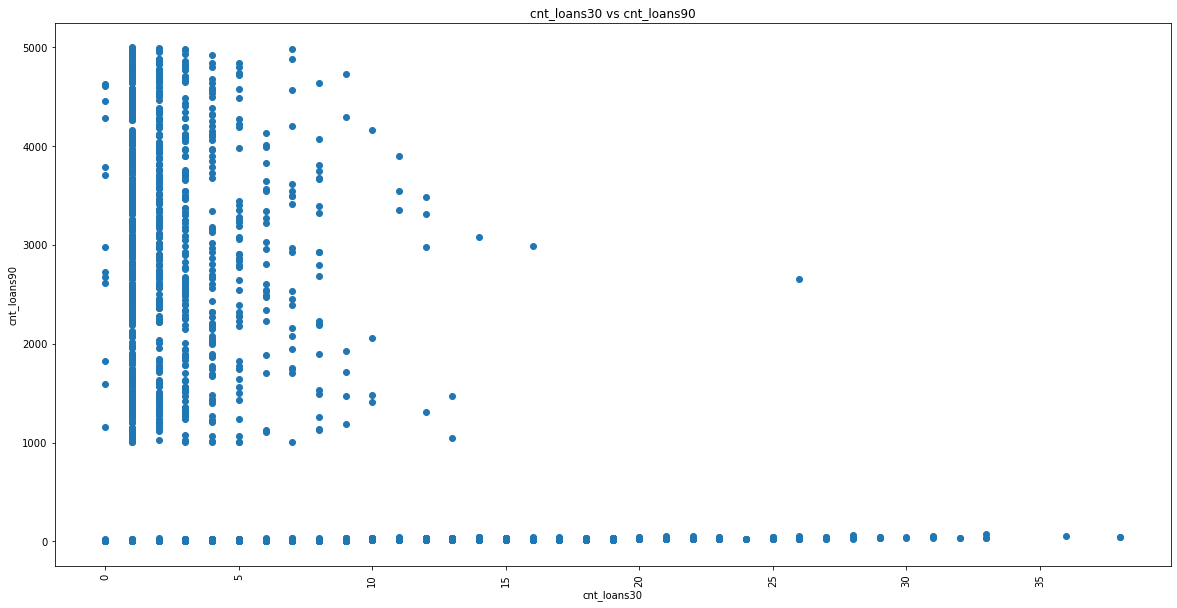

In [698]:
#cnt_loans30 vs cnt_loans90
plt.figure(figsize = (20,10))
plt.title('cnt_loans30 vs cnt_loans90')
plt.scatter(df['cnt_loans30'], df['cnt_loans90'])
plt.xticks
plt.xlabel('cnt_loans30')
plt.ylabel('cnt_loans90')
plt.xticks(rotation = 90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

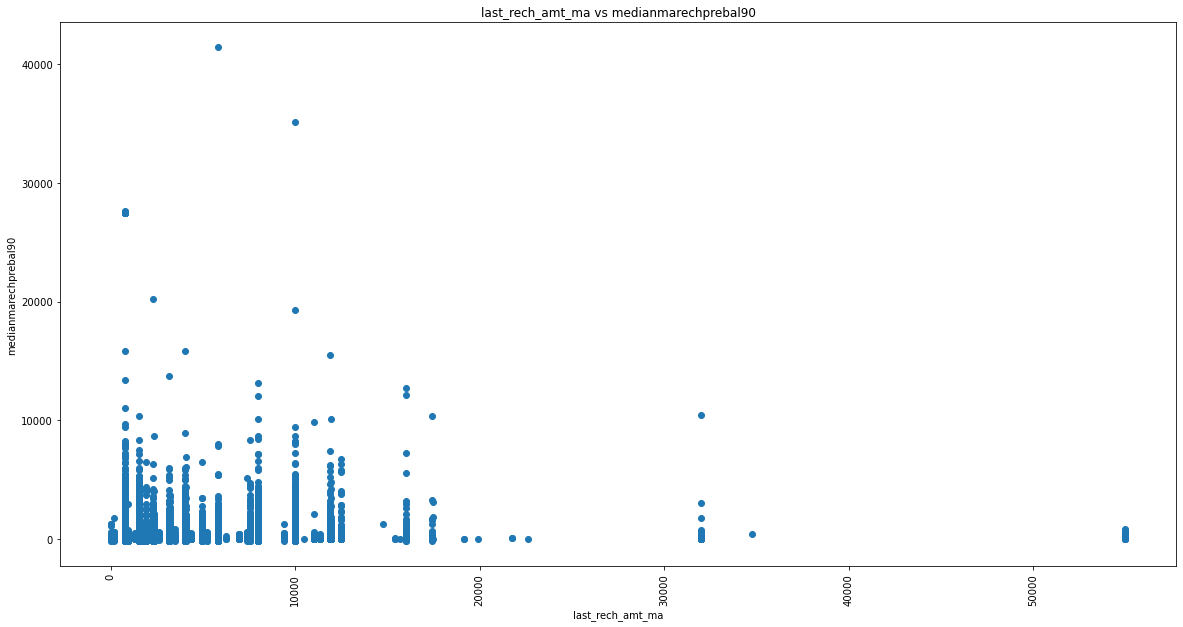

In [699]:
#last_rech_amt_ma vs medianmarechprebal90
plt.figure(figsize = (20,10))
plt.title('last_rech_amt_ma vs medianmarechprebal90')
plt.scatter(df['last_rech_amt_ma'], df['medianmarechprebal90'])
plt.xticks
plt.xlabel('last_rech_amt_ma')
plt.ylabel('medianmarechprebal90')
plt.xticks(rotation = 90)

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

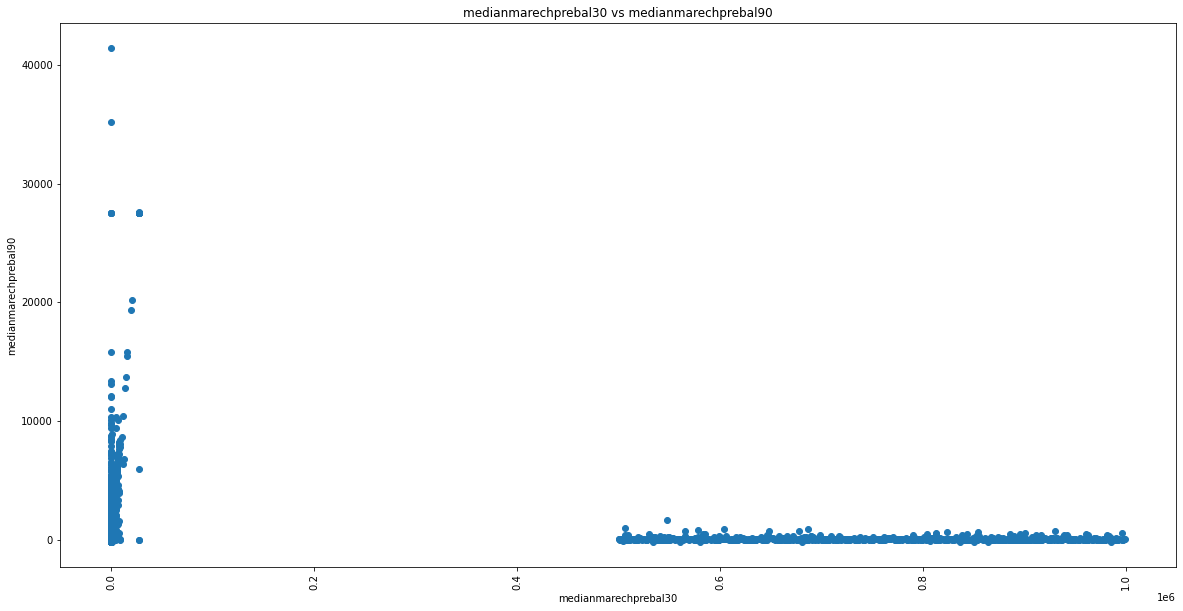

In [700]:
#medianmarechprebal30 vs medianmarechprebal90
plt.figure(figsize = (20,10))
plt.title('medianmarechprebal30 vs medianmarechprebal90')
plt.scatter(df['medianmarechprebal30'], df['medianmarechprebal90'])
plt.xticks
plt.xlabel('medianmarechprebal30')
plt.ylabel('medianmarechprebal90')
plt.xticks(rotation = 90)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

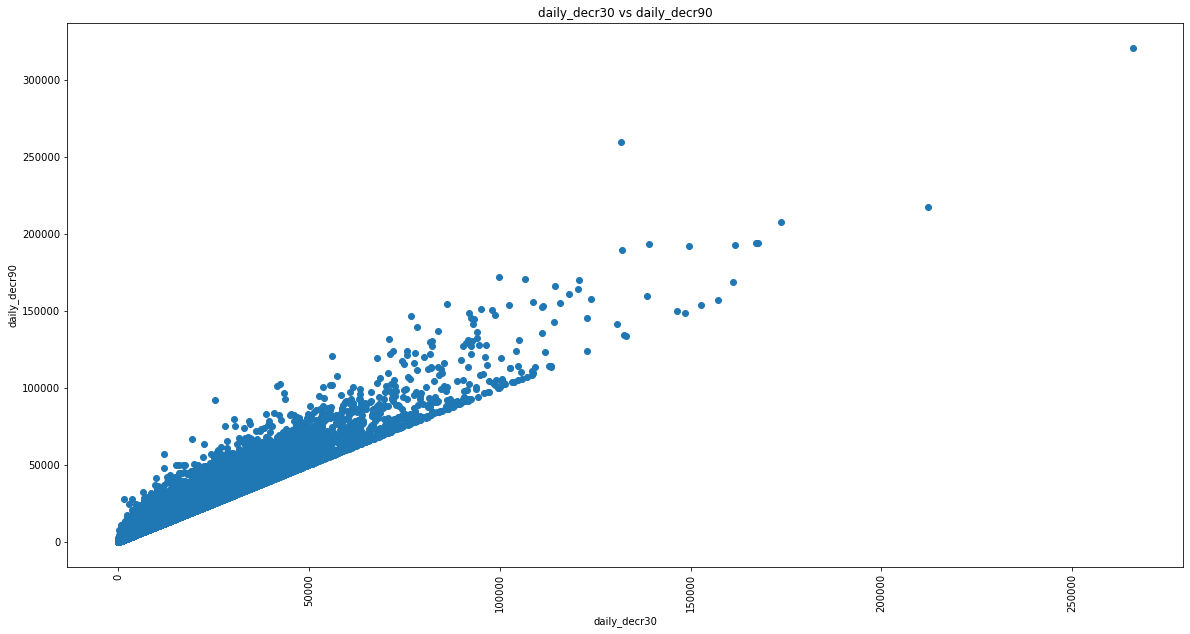

In [701]:
#daily_decr30 vs daily_decr90

plt.figure(figsize = (20,10))
plt.title('daily_decr30 vs daily_decr90')
plt.scatter(df['daily_decr30'], df['daily_decr90'])
plt.xticks
plt.xlabel('daily_decr30')
plt.ylabel('daily_decr90')
plt.xticks(rotation = 90)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

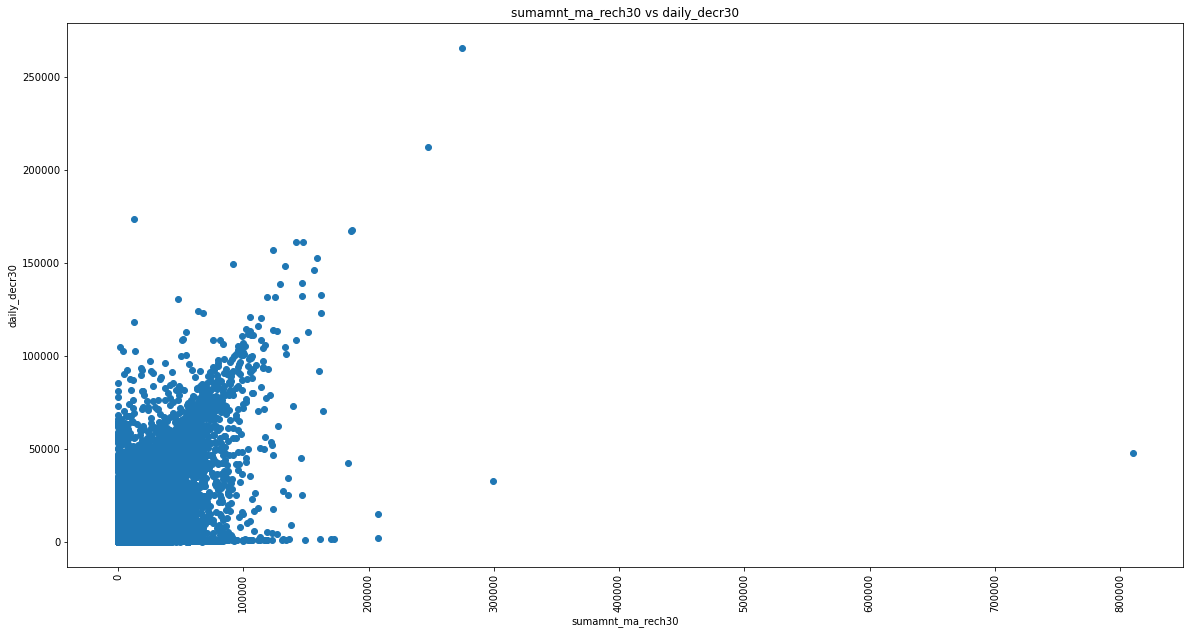

In [702]:
#sumamnt_ma_rech30 vs daily_decr30

plt.figure(figsize = (20,10))
plt.title('sumamnt_ma_rech30 vs daily_decr30')
plt.scatter(df['sumamnt_ma_rech30'], df['daily_decr30'])
plt.xticks
plt.xlabel('sumamnt_ma_rech30')
plt.ylabel('daily_decr30')
plt.xticks(rotation = 90)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

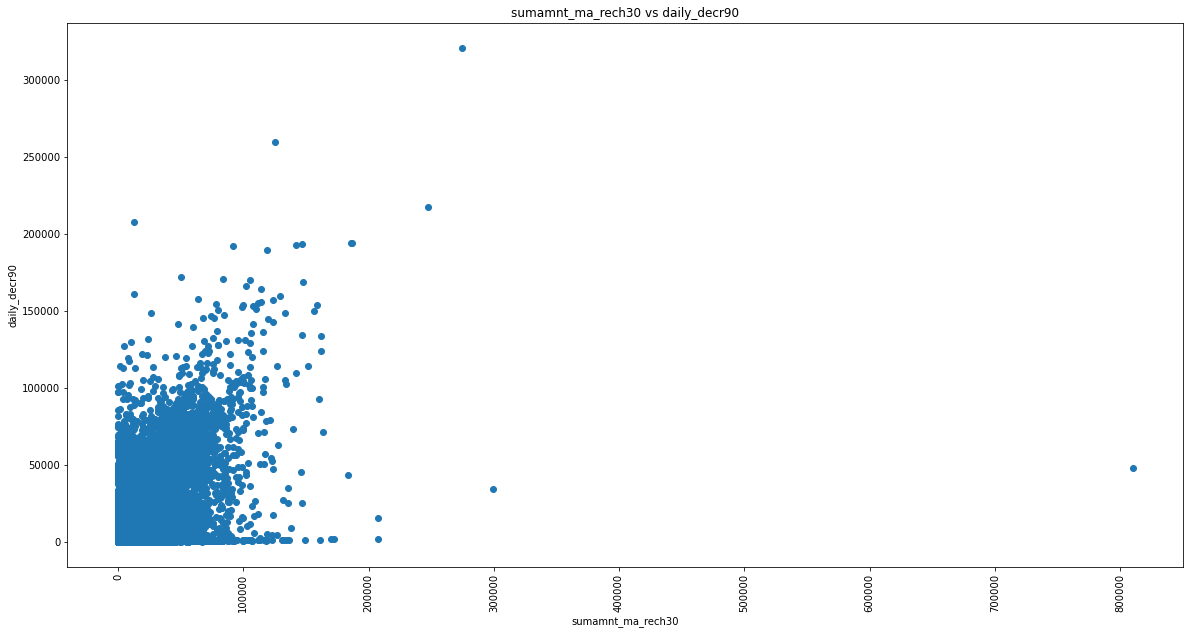

In [703]:
#sumamnt_ma_rech30 vs daily_decr90
plt.figure(figsize = (20,10))
plt.title('sumamnt_ma_rech30 vs daily_decr90')
plt.scatter(df['sumamnt_ma_rech30'], df['daily_decr90'])
plt.xticks
plt.xlabel('sumamnt_ma_rech30')
plt.ylabel('daily_decr90')
plt.xticks(rotation = 90)

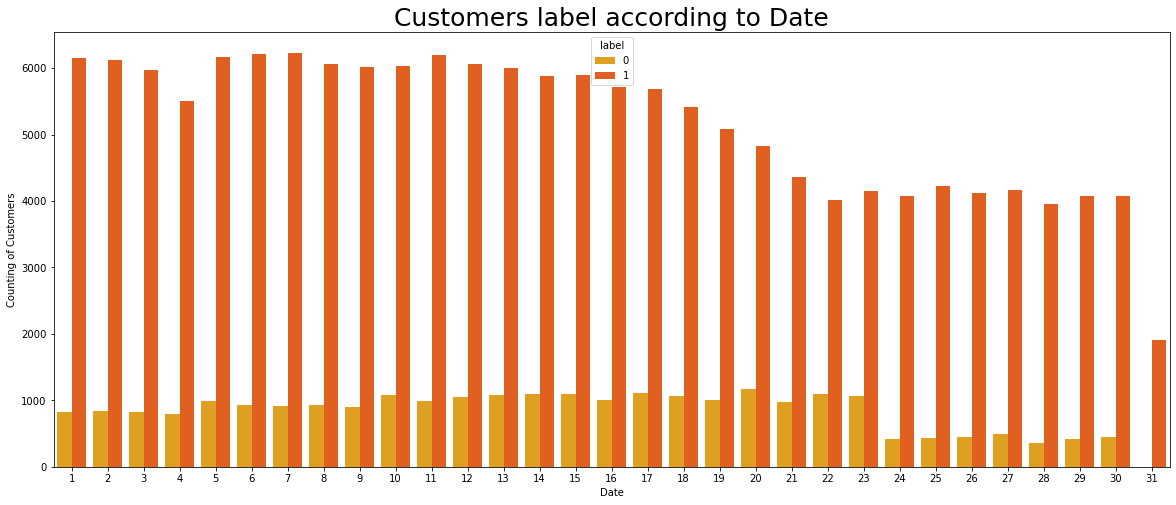

In [704]:
#Customer label according to Date
plt.figure(figsize=(20,8))
sns.countplot(x="pDay", hue='label', data=df, palette='autumn_r')
plt.title("Customers label according to Date", fontsize=25)
plt.xlabel('Date')
plt.ylabel('Counting of Customers')
plt.show()

In [705]:
#RELATION WITH PRIMARY FUEL
corr_matrix=df.corr()
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech90           0.245941
cnt_ma_rech30           0.244728
sumamnt_ma_rech90       0.212666
sumamnt_ma_rech30       0.207727
amnt_loans90            0.205065
amnt_loans30            0.199916
cnt_loans30             0.197565
daily_decr30            0.174901
daily_decr90            0.173016
pMonth                  0.163954
medianamnt_ma_rech30    0.149780
last_rech_amt_ma        0.139969
medianamnt_ma_rech90    0.129527
fr_ma_rech90            0.094709
maxamnt_loans90         0.086033
rental90                0.075869
rental30                0.057207
payback90               0.053776
payback30               0.050892
medianamnt_loans30      0.050067
medianmarechprebal90    0.041728
medianamnt_loans90      0.041265
pDay                    0.007037
cnt_loans90             0.004305
cnt_da_rech30           0.004184
last_rech_date_ma       0.004113
cnt_da_rech90           0.003601
last_rech_date_da       0.001814
fr_ma_rech30            0.001129
fr_da_rech

In [706]:
#Following have a higher realtions with label column
#cnt_ma_rech90           0.245941
#cnt_ma_rech30           0.244728
#sumamnt_ma_rech90       0.212666
#sumamnt_ma_rech30       0.207727
#amnt_loans90            0.205065

% of non defaulters and defaulters: 
 [0.8611491438604404, 0.1388508561395596]


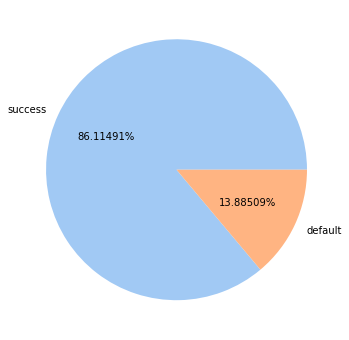

In [707]:
labels = ['success','default']
success = (df[df['label']==1].shape[0])/df.shape[0]
default = (df[df['label']==0].shape[0])/df.shape[0]
data= [success, default]
print("% of non defaulters and defaulters: \n",data)
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(8,6), facecolor='white')
plt.pie(data, labels = labels, colors = colors, autopct='%2.5f%%')
plt.show()

In [708]:
#Target feature 'Label' has unbalanced data, we need to treat the target variable using sampling technique.

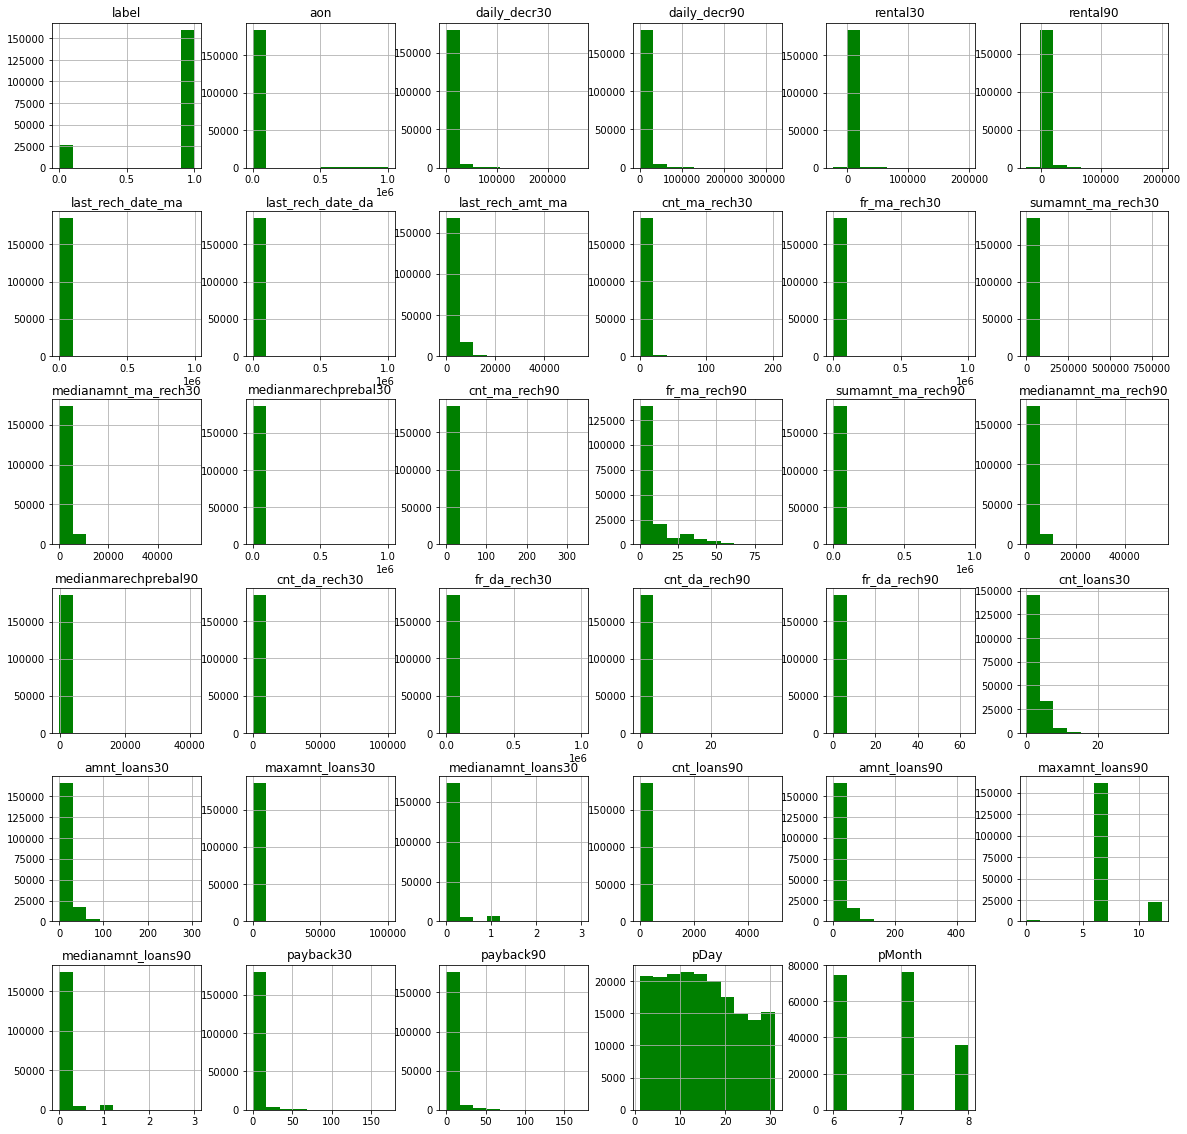

In [709]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='g')
plt.show()

In [710]:
#as tallbars show which data falls in which lane, we can see

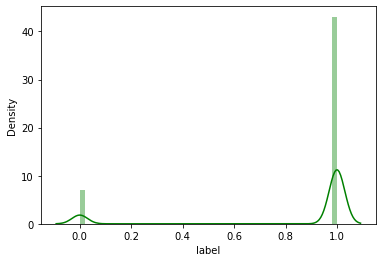

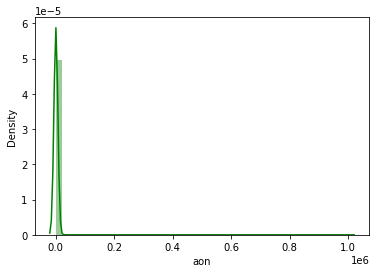

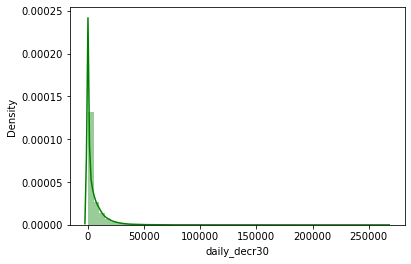

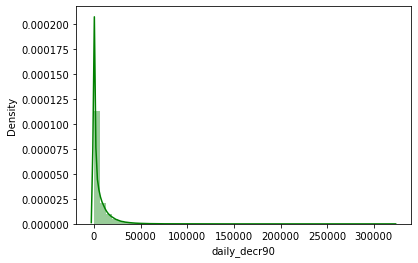

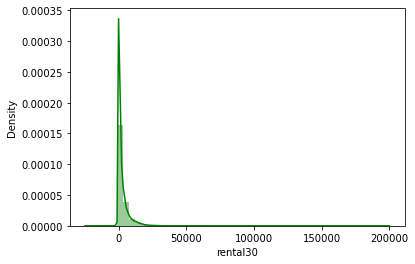

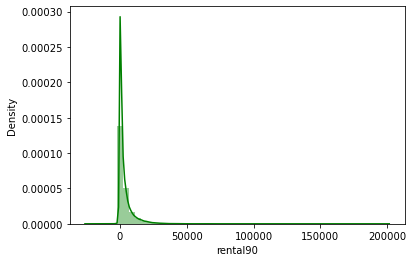

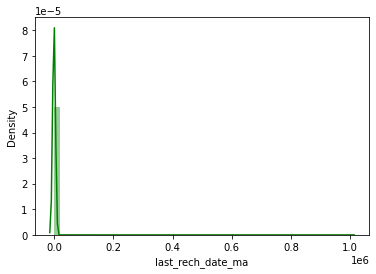

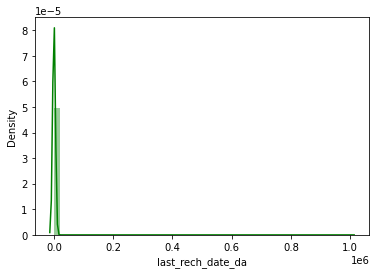

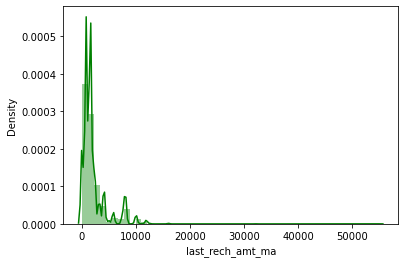

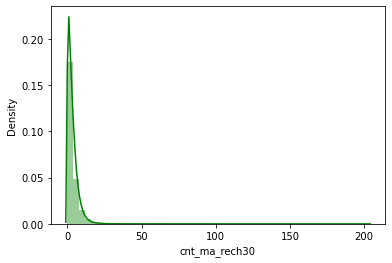

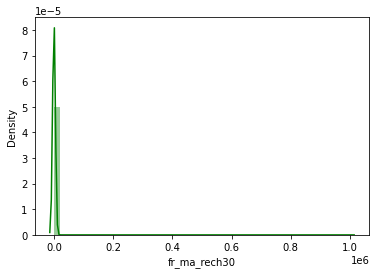

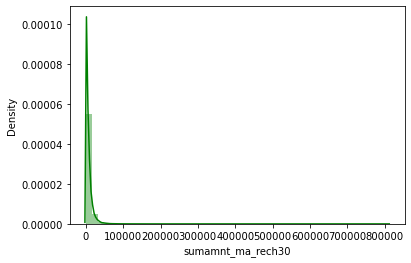

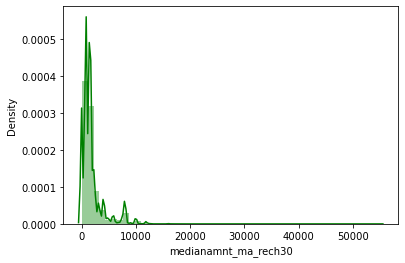

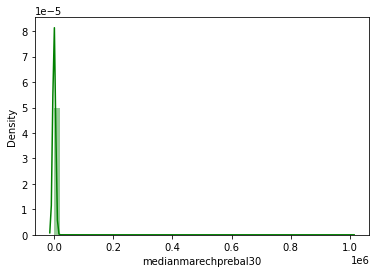

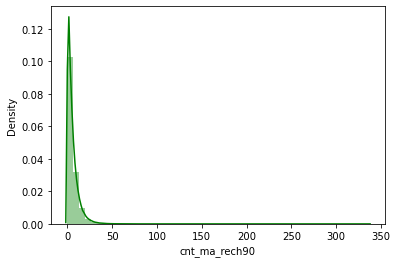

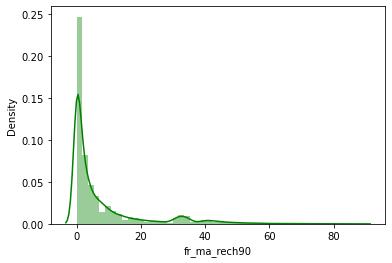

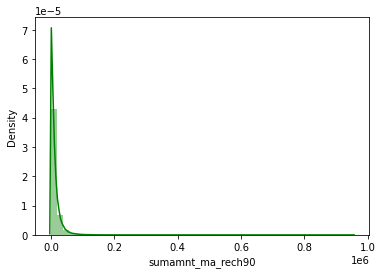

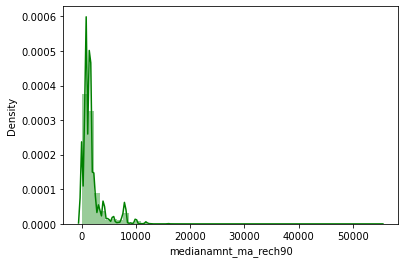

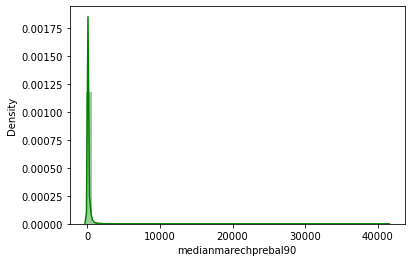

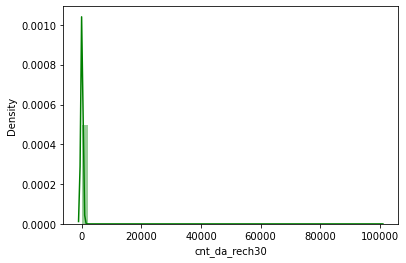

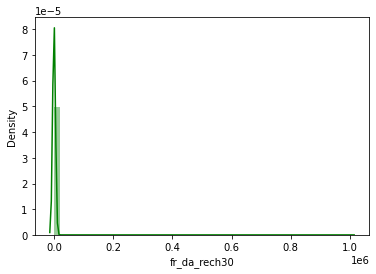

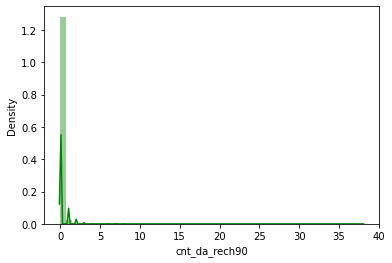

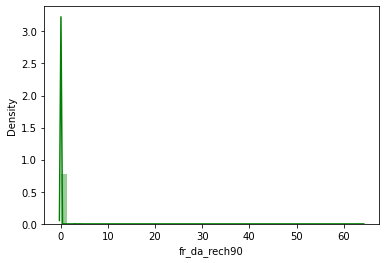

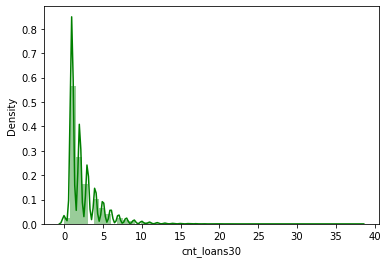

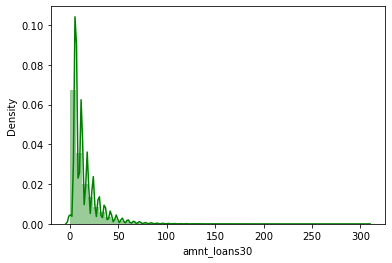

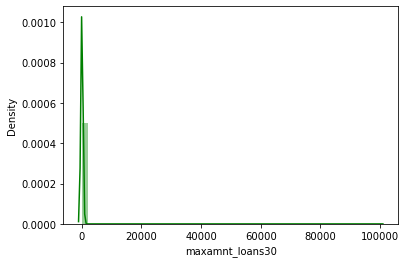

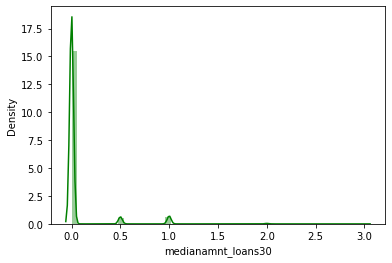

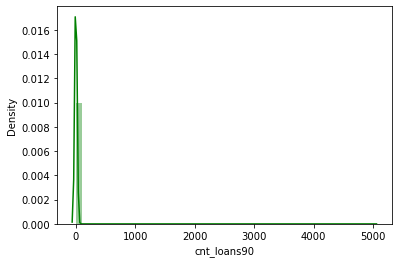

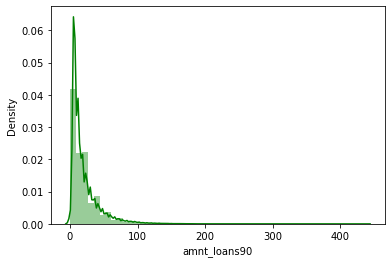

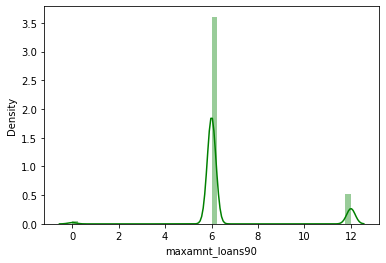

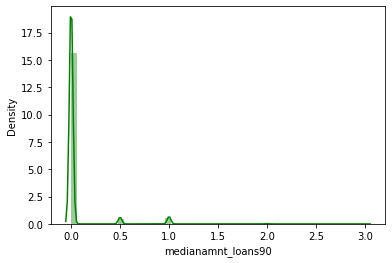

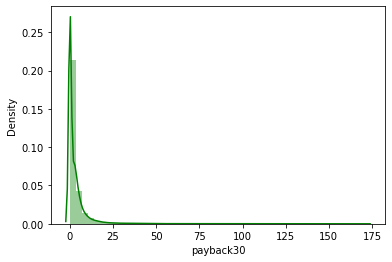

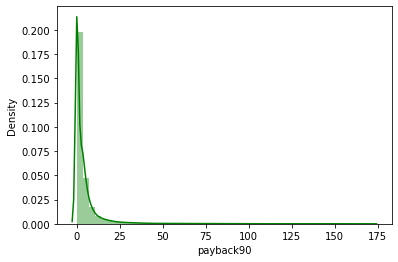

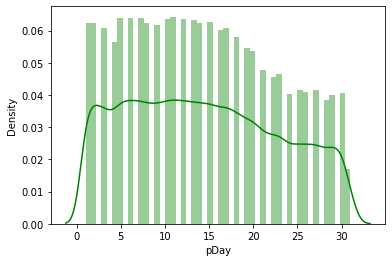

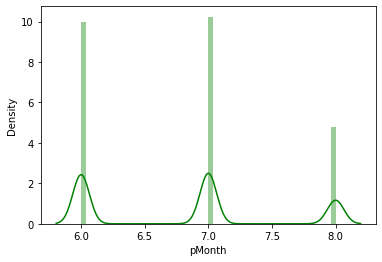

In [711]:
#checking skewness

for col in df.describe().columns:
    sns.distplot(df[col],color='g')
    plt.show()

In [712]:
df.skew()

label                   -2.088847
aon                     10.365026
daily_decr30             4.003019
daily_decr90             4.301490
rental30                 4.676793
rental90                 4.530925
last_rech_date_ma       14.852116
last_rech_date_da       14.781824
last_rech_amt_ma         3.830612
cnt_ma_rech30            3.471313
fr_ma_rech30            14.822224
sumamnt_ma_rech30        7.134012
medianamnt_ma_rech30     3.519213
medianmarechprebal30    14.677544
cnt_ma_rech90            3.558616
fr_ma_rech90             2.250443
sumamnt_ma_rech90        5.231693
medianamnt_ma_rech90     3.753115
medianmarechprebal90    43.576364
cnt_da_rech30           17.749485
fr_da_rech30            14.728609
cnt_da_rech90           28.396293
fr_da_rech90            28.959851
cnt_loans30              2.737584
amnt_loans30             3.006644
maxamnt_loans30         17.718074
medianamnt_loans30       4.470128
cnt_loans90             16.717192
amnt_loans90             3.165962
maxamnt_loans9

In [713]:
columns = [ 'aon', 'daily_decr30', 'daily_decr90','rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da','last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30','sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30','cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30','fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','amnt_loans30', 'cnt_loans90','amnt_loans90', 'payback30','payback90']
for i in columns: 
    iqr = df[i].quantile(0.75)-df[i].quantile(0.25)
    high = df[i].quantile(0.75)+(iqr*1.25)
    low  = df[i].quantile(0.25)-(iqr*1.25)
    df.loc[df[i]>high,i]=high
    df.loc[df[i]<low,i]=low  

In [714]:
#cheking the attributes after removing outliers
df.skew()

label                   -2.088847
aon                      0.862657
daily_decr30             1.127378
daily_decr90             1.132928
rental30                 1.077487
rental90                 1.079217
last_rech_date_ma        0.878145
last_rech_date_da        0.000000
last_rech_amt_ma         0.862671
cnt_ma_rech30            0.881216
fr_ma_rech30             1.120301
sumamnt_ma_rech30        0.936024
medianamnt_ma_rech30     0.558518
medianmarechprebal30     0.910127
cnt_ma_rech90            1.026801
fr_ma_rech90             1.143025
sumamnt_ma_rech90        0.996830
medianamnt_ma_rech90     0.583528
medianmarechprebal90     0.864348
cnt_da_rech30            0.000000
fr_da_rech30             0.000000
cnt_da_rech90            0.000000
fr_da_rech90             0.000000
cnt_loans30              0.888558
amnt_loans30             0.774513
maxamnt_loans30         17.718074
medianamnt_loans30       4.470128
cnt_loans90              0.984083
amnt_loans90             0.917866
maxamnt_loans9

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans30'>

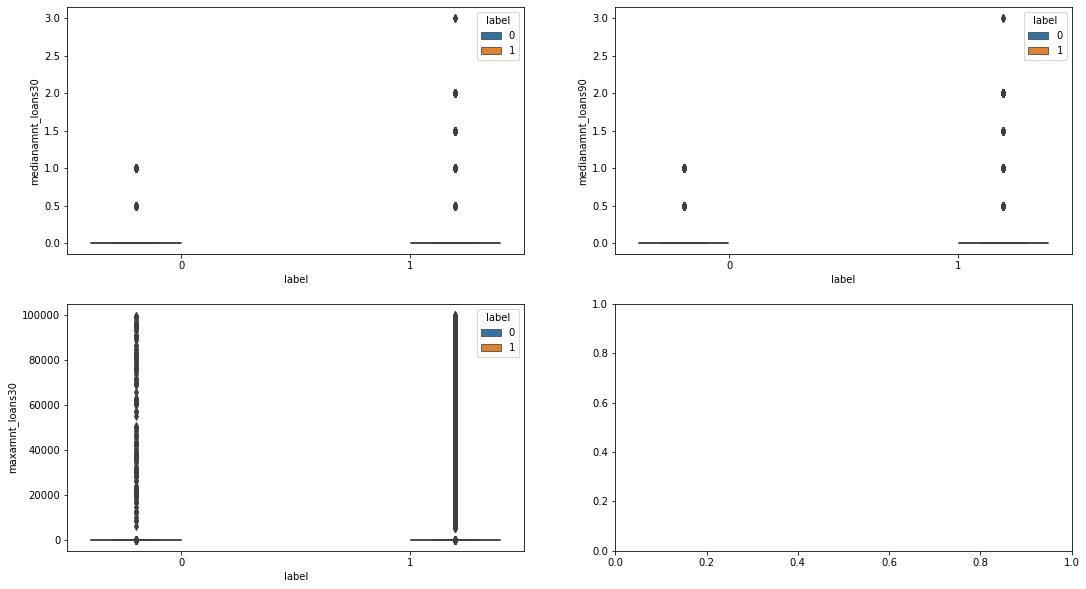

In [715]:
#plotting outliers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'label', y = 'medianamnt_loans30', hue = 'label', data = df)
sns.boxplot(ax=ax2, x = 'label', y = 'medianamnt_loans90', hue = 'label', data = df)
sns.boxplot(ax=ax3, x = 'label', y = 'maxamnt_loans30', hue = 'label', data = df)


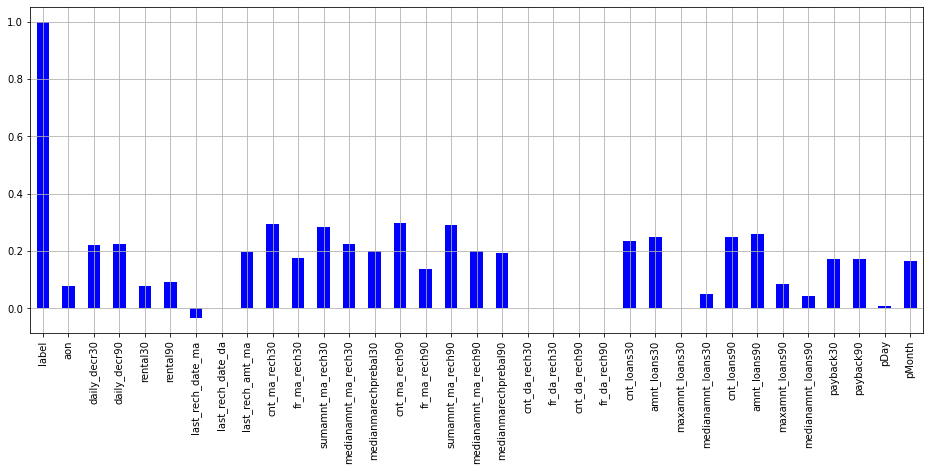

In [716]:
#checking the correlation between attributes and target variable

df.corrwith(df['label']).plot(kind='bar',grid = True, figsize=(16,6), color='blue')
plt.show()

In [717]:
#Creating a copy of our dataset
df1=df.copy()

In [718]:
df1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pDay', 'pMonth'],
      dtype='object')

In [719]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186243 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 186243 non-null  int64  
 1   aon                   186243 non-null  float64
 2   daily_decr30          186243 non-null  float64
 3   daily_decr90          186243 non-null  float64
 4   rental30              186243 non-null  float64
 5   rental90              186243 non-null  float64
 6   last_rech_date_ma     186243 non-null  float64
 7   last_rech_date_da     186243 non-null  float64
 8   last_rech_amt_ma      186243 non-null  float64
 9   cnt_ma_rech30         186243 non-null  int64  
 10  fr_ma_rech30          186243 non-null  float64
 11  sumamnt_ma_rech30     186243 non-null  float64
 12  medianamnt_ma_rech30  186243 non-null  float64
 13  medianmarechprebal30  186243 non-null  float64
 14  cnt_ma_rech90         186243 non-null  float64
 15  

In [610]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pDay,pMonth
0,2.491766,0.771613,0.185035,0.225624,0.787375,0.786014,0.589193,NaN,0.107422,0.467492,...,0.062997,0.252035,0.411484,0.447790,0.322903,0.234917,2.164476,2.141105,0.666421,0.280635
1,0.401322,0.102168,1.581636,1.389205,0.701270,0.374567,1.999244,NaN,1.994063,0.808137,...,0.061576,0.252035,0.846293,0.447790,2.543101,0.234917,0.740671,0.784044,0.519843,1.632539
2,0.401322,0.249330,0.507906,0.522785,0.495747,0.569533,0.382118,NaN,0.107422,0.808137,...,0.062997,0.252035,0.846293,0.876003,0.322903,0.234917,0.740671,0.784044,0.547795,1.632539
3,0.401322,0.833175,0.776167,0.768188,0.813411,0.820079,1.999244,NaN,0.569262,1.148781,...,0.062997,0.252035,0.411484,0.447790,0.322903,0.234917,0.740671,0.784044,0.994349,1.071270
4,0.401322,0.568847,0.750955,0.745124,0.410501,0.502299,0.175043,NaN,0.493280,1.235731,...,0.062997,0.252035,1.762561,1.693278,0.322903,0.234917,0.080987,0.109935,0.903674,1.071270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209585,0.401322,0.263024,0.262192,0.182746,0.626692,0.657455,0.589193,NaN,0.493280,0.213797,...,0.062997,0.252035,0.892943,0.836851,0.322903,0.234917,1.090452,0.718255,1.231602,0.280635
209587,0.401322,0.837146,2.079666,1.849104,2.115062,2.102148,0.653256,NaN,1.171217,0.126847,...,0.061576,4.239724,0.023325,0.408637,2.543101,4.632083,0.740671,2.141105,1.468855,1.632539
209588,0.401322,0.509478,0.750711,0.744901,0.414666,0.505584,0.796268,NaN,1.849933,0.126847,...,0.062997,0.252035,0.411484,0.447790,0.322903,0.234917,0.388532,0.495140,0.310542,1.071270
209591,0.401322,2.127752,1.652995,1.469348,0.705161,0.540968,0.589193,NaN,0.705005,0.554442,...,0.061576,0.252035,0.023325,0.408637,2.543101,0.234917,0.740671,2.141105,1.259554,0.280635


In [611]:
threshold=3
print(np.where(z>3))

(array([    30,     30,     37, ..., 186203, 186209, 186209], dtype=int64), array([26, 30, 26, ..., 29, 26, 30], dtype=int64))


In [612]:
df1_new=df1[(z<3).all(axis=1)]

In [613]:
#Checking the shape
print(df1.shape,'\t\t',df1_new.shape)

(186213, 35) 		 (0, 35)


In [614]:
#we shall not be suing the zscore method as a lot of loss of data. we will use power_transform and standard scalar

In [720]:
x=df.drop(['label'], axis=1)
y=df.label

In [721]:
#Transforming data to remove skewness:
from sklearn.preprocessing import power_transform
X_new=power_transform(x)

In [722]:
X_new

array([[-0.73011304,  0.41427598,  0.38477823, ...,  1.46395351,
         0.71320515,  0.40699925],
       [ 0.23422899,  1.30155287,  1.24074836, ..., -0.97223821,
        -0.40848655,  1.48583063],
       [-0.11988052,  0.03849124,  0.01838963, ..., -0.97223821,
         0.61229458,  1.48583063],
       ...,
       [-0.40732486, -0.6847076 , -0.68714021, ..., -0.03023182,
         0.40436101, -1.13036476],
       [ 1.89254798,  1.32454493,  1.26788966, ...,  1.46395351,
         1.1920474 ,  0.40699925],
       [ 1.67316787,  0.63019155,  0.59792518, ..., -0.97223821,
        -0.81804721,  0.40699925]])

In [723]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X=sc.fit_transform(X_new)
Scaled_X

array([[-0.73011304,  0.41427598,  0.38477823, ...,  1.46395351,
         0.71320515,  0.40699925],
       [ 0.23422899,  1.30155287,  1.24074836, ..., -0.97223821,
        -0.40848655,  1.48583063],
       [-0.11988052,  0.03849124,  0.01838963, ..., -0.97223821,
         0.61229458,  1.48583063],
       ...,
       [-0.40732486, -0.6847076 , -0.68714021, ..., -0.03023182,
         0.40436101, -1.13036476],
       [ 1.89254798,  1.32454493,  1.26788966, ...,  1.46395351,
         1.1920474 ,  0.40699925],
       [ 1.67316787,  0.63019155,  0.59792518, ..., -0.97223821,
        -0.81804721,  0.40699925]])

In [724]:
Scaled_X

array([[-0.73011304,  0.41427598,  0.38477823, ...,  1.46395351,
         0.71320515,  0.40699925],
       [ 0.23422899,  1.30155287,  1.24074836, ..., -0.97223821,
        -0.40848655,  1.48583063],
       [-0.11988052,  0.03849124,  0.01838963, ..., -0.97223821,
         0.61229458,  1.48583063],
       ...,
       [-0.40732486, -0.6847076 , -0.68714021, ..., -0.03023182,
         0.40436101, -1.13036476],
       [ 1.89254798,  1.32454493,  1.26788966, ...,  1.46395351,
         1.1920474 ,  0.40699925],
       [ 1.67316787,  0.63019155,  0.59792518, ..., -0.97223821,
        -0.81804721,  0.40699925]])

In [725]:
pd.DataFrame(Scaled_X, columns=x.columns).skew().sort_values(ascending=False)

medianamnt_loans90      3.683321
medianamnt_loans30      3.380038
maxamnt_loans90         0.389151
payback30               0.333267
aon                     0.269230
payback90               0.207201
fr_ma_rech30            0.130723
rental30                0.121284
fr_ma_rech90            0.095333
medianmarechprebal90    0.094964
rental90                0.081558
pMonth                  0.078898
cnt_loans90             0.076381
cnt_loans30             0.031362
last_rech_date_da       0.000000
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
amnt_loans30           -0.004890
amnt_loans90           -0.005257
medianmarechprebal30   -0.018013
cnt_ma_rech90          -0.031328
cnt_ma_rech30          -0.032035
last_rech_date_ma      -0.145948
pDay                   -0.155900
sumamnt_ma_rech90      -0.396894
last_rech_amt_ma       -0.408678
sumamnt_ma_rech30      -0.494425
medianamnt_ma_rech90   -0.519616
medianamnt

In [726]:
x.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pDay', 'pMonth'],
      dtype='object')

In [727]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186243 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   aon                   186243 non-null  float64
 1   daily_decr30          186243 non-null  float64
 2   daily_decr90          186243 non-null  float64
 3   rental30              186243 non-null  float64
 4   rental90              186243 non-null  float64
 5   last_rech_date_ma     186243 non-null  float64
 6   last_rech_date_da     186243 non-null  float64
 7   last_rech_amt_ma      186243 non-null  float64
 8   cnt_ma_rech30         186243 non-null  int64  
 9   fr_ma_rech30          186243 non-null  float64
 10  sumamnt_ma_rech30     186243 non-null  float64
 11  medianamnt_ma_rech30  186243 non-null  float64
 12  medianmarechprebal30  186243 non-null  float64
 13  cnt_ma_rech90         186243 non-null  float64
 14  fr_ma_rech90          186243 non-null  float64
 15  

In [728]:
X=pd.DataFrame(Scaled_X, columns=x.columns)

In [729]:
X.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pDay', 'pMonth'],
      dtype='object')

In [730]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(X)

array([[-5.93431652e-01,  6.11905343e-01,  6.90912243e-01, ...,
         9.30700740e-17, -7.36141267e-17,  4.53786015e-17],
       [-5.62813314e-01, -2.77698725e+00, -2.36437764e+00, ...,
         2.71234026e-16, -2.34848535e-16,  2.41648579e-16],
       [ 2.27372425e+00, -1.38613242e+00, -1.01568409e+00, ...,
        -1.41984518e-17, -3.95425018e-17, -6.71628908e-18],
       ...,
       [-5.91769893e-01, -1.42348750e+00,  2.32678984e+00, ...,
        -1.47739454e-18,  2.22323296e-18, -4.08070950e-18],
       [-2.80517929e+00, -1.06084454e-01,  1.20893709e-01, ...,
         4.92237289e-18,  5.01621028e-18, -7.34344287e-19],
       [-2.04043812e+00, -3.03663427e+00,  7.89688695e-01, ...,
        -5.67645218e-18, -6.13149066e-18, -4.36496852e-20]])

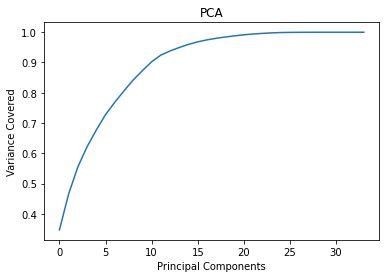

In [731]:
#Let's plot Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

In [732]:
#Around 25 Principal Components are able to explain > 98 % variance. Its safe to consider starting 25 PC's
pca=PCA(n_components=25)
new_pcomp=pca.fit_transform(X_scaler)
Princi_comp = pd.DataFrame(new_pcomp, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25'])
Princi_comp #PC 25 are the features

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-0.268742,0.782568,0.480153,-0.873314,1.164058,1.750203,-0.293886,1.378726,0.537732,-2.079431,...,-0.278882,0.148470,-0.324313,0.205098,-0.011899,0.004801,-0.083191,-0.122769,-0.114066,-0.029493
1,-0.606445,-2.742064,-2.420180,0.786840,-3.244272,1.286115,-0.959885,-0.773183,-0.306657,0.179425,...,0.613285,-0.620803,-0.649949,0.320693,0.096888,-0.072522,-0.204467,-0.106040,-0.160913,0.072806
2,2.201474,-1.424848,-0.976162,-0.155964,-0.776556,-0.528901,-0.425690,-0.605453,-0.077695,0.404458,...,-0.091995,-0.246945,0.251758,1.176815,0.075539,-0.068150,-0.116858,-0.052805,-0.139427,0.018858
3,3.846148,1.075342,0.220298,-0.045406,-0.795284,0.872175,-0.863191,-1.436898,-0.524115,-0.916328,...,0.595729,0.657419,-0.074419,-0.507072,-0.591203,-0.003561,0.387200,-0.152145,-0.034343,-0.030091
4,-2.989228,1.033464,2.751777,-0.555421,-0.149463,0.932561,0.947461,-1.270444,-0.489003,0.807340,...,0.297792,0.029748,0.169872,0.185942,0.167182,0.010256,0.377467,-0.100728,0.020562,0.362173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186238,-2.952602,1.024606,1.010632,-0.615058,1.101016,0.807027,-1.912572,0.511559,0.073909,-0.125965,...,0.220820,0.064238,-0.549203,-0.037969,-0.063670,-0.023056,-0.221624,-0.230403,-0.134857,0.006660
186239,-3.620915,-2.786869,-2.453733,5.470924,0.755304,0.661737,-0.268185,0.795912,1.039451,-0.888876,...,0.189762,-1.296511,0.833696,-0.776791,-0.880413,0.526299,0.126813,-0.911896,-0.254218,0.251718
186240,-0.648359,-1.467608,2.306772,-0.526078,-0.550063,-0.049837,0.724472,-0.316683,0.548285,0.378202,...,0.137537,0.270210,-0.003660,-0.014633,-0.057954,-0.011791,-0.135827,0.029761,-0.103219,-0.001057
186241,-2.835062,-0.100369,0.112699,0.769468,-1.758411,-0.732388,-0.968367,1.636679,-1.091758,1.153251,...,0.318458,-0.058876,0.405267,-0.698498,-0.115694,0.255269,0.689882,-1.606341,-0.081499,0.595198


In [733]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
## RandomOverSampler to handle imbalanced data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [734]:
smote=SMOTE()
#fit predictor and target variable
x_smote, y_smote=smote.fit_resample(Princi_comp,y)

In [735]:
print('original datashape', Counter(y))
print('original datashape', Counter(y_smote))

original datashape Counter({1: 160383, 0: 25860})
original datashape Counter({0: 160383, 1: 160383})


In [736]:
print('original datashape', Counter(y))


original datashape Counter({1: 160383, 0: 25860})


In [737]:
x_smote.shape

(320766, 25)

In [738]:
y_smote.shape

(320766,)

In [739]:
from sklearn.model_selection import train_test_split
LR=LogisticRegression()

In [441]:
#Splitting the dataframe:
for i in range(0,300):
    x_train,x_test,y_train,y_test=train_test_split(Princi_comp,y,random_state=i,test_size=0.25)
    LR.fit(x_train, y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state state",i,"The model performs very well")
        print("At random_state state:-",i)
        print("Training accuracy_score is:-", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random_state state 0 The model performs very well
At random_state state:- 0
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 1 The model performs very well
At random_state state:- 1
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 2 The model performs very well
At random_state state:- 2
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 3 The model performs very well
At random_state state:- 3
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 4 The model performs very well
At random_state state:- 4
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 5 The model performs very well
At random_state state:- 5
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 6 The model performs very well
At random_state state:- 6
Training accura

At random_state state 54 The model performs very well
At random_state state:- 54
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 55 The model performs very well
At random_state state:- 55
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 56 The model performs very well
At random_state state:- 56
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 57 The model performs very well
At random_state state:- 57
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 58 The model performs very well
At random_state state:- 58
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 59 The model performs very well
At random_state state:- 59
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 60 The model performs very well
At random_state state:- 60
T

At random_state state 108 The model performs very well
At random_state state:- 108
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 109 The model performs very well
At random_state state:- 109
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 110 The model performs very well
At random_state state:- 110
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 111 The model performs very well
At random_state state:- 111
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 112 The model performs very well
At random_state state:- 112
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 113 The model performs very well
At random_state state:- 113
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 114 The model performs very well
At random_state

At random_state state 161 The model performs very well
At random_state state:- 161
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 162 The model performs very well
At random_state state:- 162
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 163 The model performs very well
At random_state state:- 163
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 164 The model performs very well
At random_state state:- 164
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 165 The model performs very well
At random_state state:- 165
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 166 The model performs very well
At random_state state:- 166
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 167 The model performs very well
At random_state

At random_state state 214 The model performs very well
At random_state state:- 214
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 215 The model performs very well
At random_state state:- 215
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 216 The model performs very well
At random_state state:- 216
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 217 The model performs very well
At random_state state:- 217
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 218 The model performs very well
At random_state state:- 218
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 219 The model performs very well
At random_state state:- 219
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 220 The model performs very well
At random_state

At random_state state 267 The model performs very well
At random_state state:- 267
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 268 The model performs very well
At random_state state:- 268
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 269 The model performs very well
At random_state state:- 269
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 270 The model performs very well
At random_state state:- 270
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 271 The model performs very well
At random_state state:- 271
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 272 The model performs very well
At random_state state:- 272
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 273 The model performs very well
At random_state

In [442]:
#Splitting the dataframe:
for i in range(0,300):
    x_smote,x_test,y_smote,y_test=train_test_split(Princi_comp,y,random_state=i,test_size=0.25)
    LR.fit(x_smote, y_smote)
    pred_train=LR.predict(x_smote)
    pred_test=LR.predict(x_test)
    if round(accuracy_score(y_smote, pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state state",i,"The model performs very well")
        print("At random_state state:-",i)
        print("Training accuracy_score is:-", round(accuracy_score(y_smote,pred_train)*100,1))
        print("Testing accuracy_score is:-", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random_state state 0 The model performs very well
At random_state state:- 0
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 1 The model performs very well
At random_state state:- 1
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 2 The model performs very well
At random_state state:- 2
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 3 The model performs very well
At random_state state:- 3
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 4 The model performs very well
At random_state state:- 4
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 5 The model performs very well
At random_state state:- 5
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 6 The model performs very well
At random_state state:- 6
Training accura

At random_state state 54 The model performs very well
At random_state state:- 54
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 55 The model performs very well
At random_state state:- 55
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 56 The model performs very well
At random_state state:- 56
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 57 The model performs very well
At random_state state:- 57
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 58 The model performs very well
At random_state state:- 58
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 59 The model performs very well
At random_state state:- 59
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 60 The model performs very well
At random_state state:- 60
T

At random_state state 108 The model performs very well
At random_state state:- 108
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 109 The model performs very well
At random_state state:- 109
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 110 The model performs very well
At random_state state:- 110
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 111 The model performs very well
At random_state state:- 111
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 112 The model performs very well
At random_state state:- 112
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 113 The model performs very well
At random_state state:- 113
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 114 The model performs very well
At random_state

At random_state state 161 The model performs very well
At random_state state:- 161
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 162 The model performs very well
At random_state state:- 162
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 163 The model performs very well
At random_state state:- 163
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 164 The model performs very well
At random_state state:- 164
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 165 The model performs very well
At random_state state:- 165
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 166 The model performs very well
At random_state state:- 166
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 167 The model performs very well
At random_state

At random_state state 214 The model performs very well
At random_state state:- 214
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 215 The model performs very well
At random_state state:- 215
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 216 The model performs very well
At random_state state:- 216
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 217 The model performs very well
At random_state state:- 217
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 218 The model performs very well
At random_state state:- 218
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 219 The model performs very well
At random_state state:- 219
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 220 The model performs very well
At random_state

At random_state state 267 The model performs very well
At random_state state:- 267
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 268 The model performs very well
At random_state state:- 268
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 269 The model performs very well
At random_state state:- 269
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 270 The model performs very well
At random_state state:- 270
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 271 The model performs very well
At random_state state:- 271
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 272 The model performs very well
At random_state state:- 272
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 100.0 


At random_state state 273 The model performs very well
At random_state

In [443]:
#trying scores without smote
x_train, x_test, y_train, y_test  = train_test_split(Princi_comp,y, test_size=0.25, random_state=1)

In [448]:
from sklearn.model_selection import train_test_split, GridSearchCV
# metrics and models

import xgboost as xgb
from xgboost import XGBRegressor

In [446]:
!pip install xgboost



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [449]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier 
xgb=XGBRegressor()

In [450]:
lr.fit(x_train, y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
adb.fit(x_train,y_train)
svm.fit(x_train,y_train)
gdboost.fit(x_train,y_train)
xgb.fit(x_train,y_train)
print("Model is trained")

Model is trained


In [451]:
print("Lr classification score",lr.score(x_train,y_train))
print("knn classification score",knn.score(x_train,y_train))
print("dt classification score",dt.score(x_train,y_train))
print("rf classification score",rf.score(x_train,y_train))
print("adb classification score",adb.score(x_train,y_train))
print("svm classification score",svm.score(x_train,y_train))
print("gdboost classification score",gdboost.score(x_train,y_train))
print("xgb classification score",xgb.score(x_train,y_train))

Lr classification score 1.0
knn classification score 0.999620566715826
dt classification score 1.0
rf classification score 1.0
adb classification score 1.0
svm classification score 1.0
gdboost classification score 1.0
xgb classification score 0.9994870160233361


In [452]:
#trying with smote scores
x_smote, x_test, y_smote, y_test = train_test_split(Princi_comp,y, test_size=0.25, random_state=1)

In [453]:
lr.fit(x_smote, y_smote)
knn.fit(x_smote,y_smote)
dt.fit(x_smote,y_smote)
rf.fit(x_smote,y_smote)
adb.fit(x_smote,y_smote)
svm.fit(x_smote,y_smote)
gdboost.fit(x_smote,y_smote)
xgb.fit(x_smote,y_smote)
print("Model is trained")

Model is trained


In [455]:
print("Lr classification score",lr.score(x_smote, y_smote))
print("knn classification score",knn.score(x_smote, y_smote))
print("dt classification score",dt.score(x_smote, y_smote))
print("rf classification score",rf.score(x_smote, y_smote))
print("adb classification score",adb.score(x_smote, y_smote))
print("svm classification score",svm.score(x_smote, y_smote))
print("gdboost classification score",gdboost.score(x_smote, y_smote))
print("xgb classification score",xgb.score(x_smote, y_smote))

Lr classification score 1.0
knn classification score 0.999620566715826
dt classification score 1.0
rf classification score 1.0
adb classification score 1.0
svm classification score 1.0
gdboost classification score 1.0
xgb classification score 0.9994870160233361


In [456]:
#classification report
lr_yprad = lr.predict(x_test)
knn_yprad = knn.predict(x_test)
dt_yprad = dt.predict(x_test)
rf_yprad = rf.predict(x_test)
adb_yprad = adb.predict(x_test)
svm_yprad = svm.predict(x_test)
gdboost_yprad = gdboost.predict(x_test)

In [457]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
#checking the roc_auc_score
print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dt.predict(x_test)))
print(roc_auc_score(y_test,rf.predict(x_test)))
print(roc_auc_score(y_test,adb.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))
print(roc_auc_score(y_test,gdboost.predict(x_test)))

1.0
0.9975765907332371
0.9977596911991641
0.9997666822211853
1.0
0.9998444548141234
0.9994959877853387


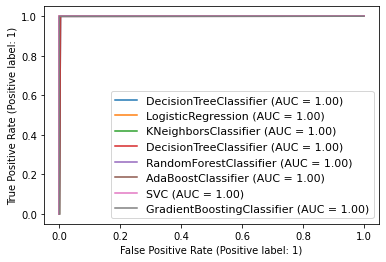

In [458]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,x_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

In [459]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,gdboost_yprad))
pd.crosstab(y_test,gdboost_yprad)

0.9998067051824489


col_0,0,1
label,,
0,6423,6
1,3,40129


In [460]:
#FOR LOGICTIC REGRESSION
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,lr_yprad))
pd.crosstab(y_test,lr_yprad)

1.0


col_0,0,1
label,,
0,6429,0
1,0,40132


In [461]:
#FOR KNN NEIGHBOR
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,knn_yprad))
pd.crosstab(y_test,knn_yprad)

0.9993127295375959


col_0,0,1
label,,
0,6398,31
1,1,40131


In [462]:
#FOR RANDOM FOREST
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,rf_yprad))
pd.crosstab(y_test,rf_yprad)

0.9999355683941497


col_0,0,1
label,,
0,6426,3
1,0,40132


In [463]:
#FOR Adaboost FOREST
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,adb_yprad))
pd.crosstab(y_test,adb_yprad)

1.0


col_0,0,1
label,,
0,6429,0
1,0,40132


In [464]:
#with SVM
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,svm_yprad))
pd.crosstab(y_test,svm_yprad)

0.9999570455960998


col_0,0,1
label,,
0,6427,2
1,0,40132


*******************RESULTS*******************
The accuracy score of train is : 100.0
The accuracy score test is : 100.0
The cross validation score is : 100.0
Confusion Matrix: 
 [[ 6429     0]
 [    0 40132]]
Classification 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6429
           1       1.00      1.00      1.00     40132

    accuracy                           1.00     46561
   macro avg       1.00      1.00      1.00     46561
weighted avg       1.00      1.00      1.00     46561

***********************************************


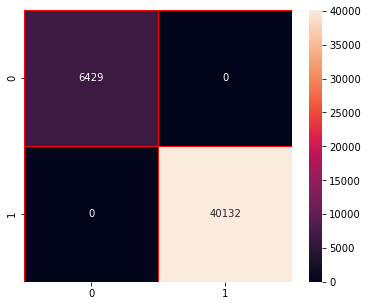

In [585]:
lr_clf = LogisticRegression()
lr_clf.fit(x_smote, y_smote)
y_pred_train = lr_clf.predict(x_smote)
y_pred = lr_clf.predict(x_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_smote, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(lr_clf,x_smote, y_smote,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification \n", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 100.0
The accuracy score test is : 99.99355683941496
The cross validation score is : 99.99140911409205
Confusion Matrix: 
 [[ 6426     3]
 [    0 40132]]
Classification
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6429
           1       1.00      1.00      1.00     40132

    accuracy                           1.00     46561
   macro avg       1.00      1.00      1.00     46561
weighted avg       1.00      1.00      1.00     46561

***********************************************


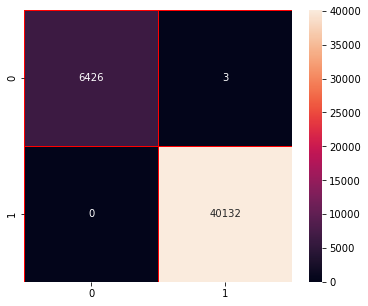

In [590]:
ran_clf = RandomForestClassifier()
ran_clf.fit(x_smote, y_smote)
Ry_pred_train = ran_clf.predict(x_smote)
Ry_pred = ran_clf.predict(x_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_smote, Ry_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, Ry_pred)*100)
cv_score = cross_val_score(ran_clf,x_smote, y_smote,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, Ry_pred))
print("Classification\n ", classification_report(y_test, Ry_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, Ry_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)

plt.show()

*******************RESULTS*******************
The accuracy score of train is : 99.9620566715826
The accuracy score test is : 99.93127295375959
The cross validation score is : 99.92196561782093
Confusion Matrix: 
 [[ 6398    31]
 [    1 40131]]
Classification 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6429
           1       1.00      1.00      1.00     40132

    accuracy                           1.00     46561
   macro avg       1.00      1.00      1.00     46561
weighted avg       1.00      1.00      1.00     46561

***********************************************


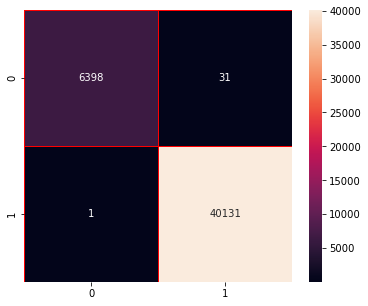

In [588]:
#KNN NEighnor 
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_smote, y_smote)
knn_pred_train = knn_clf.predict(x_smote)
knn_pred = knn_clf.predict(x_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_smote, knn_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, knn_pred)*100)
cv_score = cross_val_score(knn_clf,x_smote, y_smote,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
print("Classification \n", classification_report(y_test, knn_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, knn_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 100.0
The accuracy score test is : 99.88831854985932
The cross validation score is : 99.85968126574762
Confusion Matrix: 
 [[ 6406    23]
 [   29 40103]]
Classification 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6429
           1       1.00      1.00      1.00     40132

    accuracy                           1.00     46561
   macro avg       1.00      1.00      1.00     46561
weighted avg       1.00      1.00      1.00     46561

***********************************************


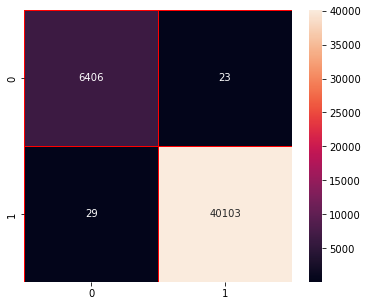

In [589]:
#DecisionTreeClassifier 
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_smote, y_smote)
dt_pred_train = dt_clf.predict(x_smote)
dt_pred = dt_clf.predict(x_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_smote, dt_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, dt_pred)*100)
cv_score = cross_val_score(dt_clf,x_smote, y_smote,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, dt_pred))
print("Classification \n", classification_report(y_test, dt_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, dt_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

In [ ]:
#DecisionTreeClassifier 
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_smote, y_smote)
dt_pred_train = dt_clf.predict(x_smote)
dt_pred = dt_clf.predict(x_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_smote, dt_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, dt_pred)*100)
cv_score = cross_val_score(dt_clf,x_smote, y_smote,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, dt_pred))
print("Classification \n", classification_report(y_test, dt_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, dt_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

In [ ]:
#all 5 models have accuracy more than 99%, but logistic regression has the lease negative values int he matrix

In [740]:
LogisticRegression=lr_clf.fit(x_smote, y_smote)

In [741]:
import pickle as pkl
micro_finance_Model='micro_finance_Model.pickle'
pkl.dump(LogisticRegression, open(micro_finance_Model,'wb'))